#**1.`Load and visualize MNIST`**



In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
import torch
import torch.nn as nn
import torch.optim as optimizer
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
train_transform=transforms.Compose([
                                    transforms.ToTensor(),
                                     
])

In [69]:
trainset=torchvision.datasets.MNIST('./data',train=True,download=True,transform=train_transform)

In [70]:
batch_size=4

In [71]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [72]:
dataiter=iter(trainloader)
images,label=next(dataiter)
print(images.shape)
print(images[0].shape)

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])


In [73]:
def imshow(img,title):
  plt.figure(figsize=(4*batch_size,4))
  plt.axis('off')
  plt.imshow(np.transpose(img,(1,2,0)))
  plt.title(title)
  plt.show()

In [74]:
def show_batch(trainloader):
  dataiter=iter(trainloader)
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item())+'                                        ' for x in label])
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item()) +'                                        'for x in label])
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item())+'                                           ' for x in label])
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item())+'                                             ' for x in label])
  return images,label

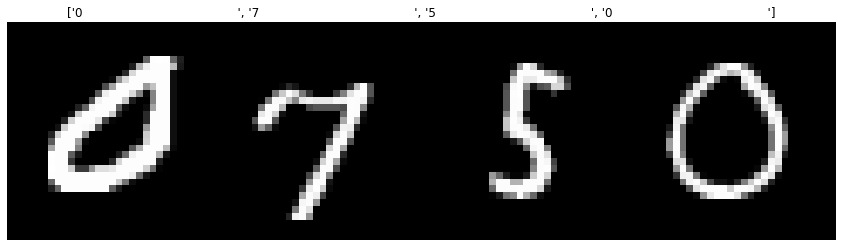

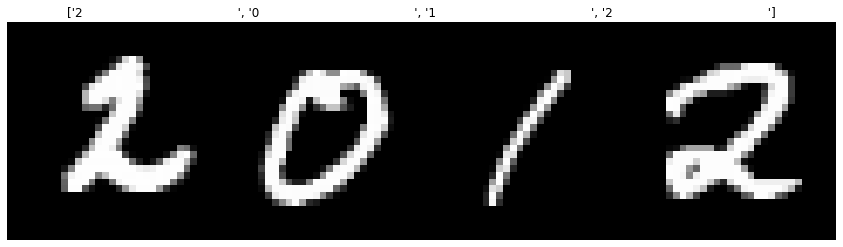

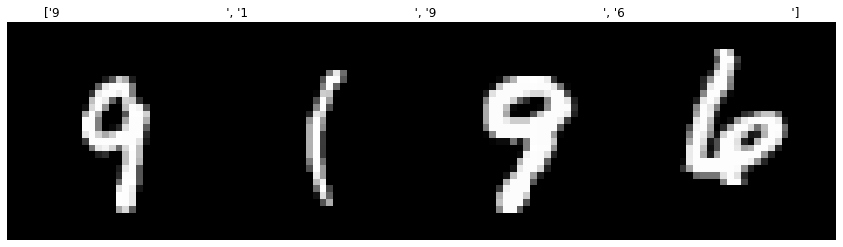

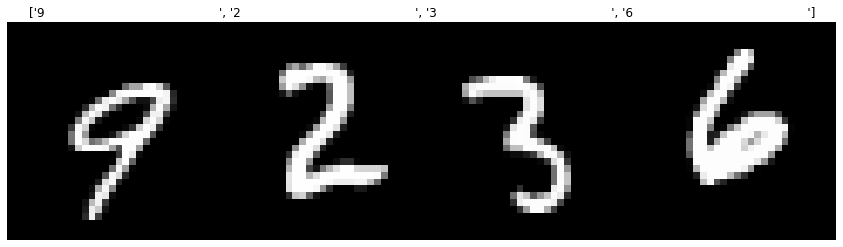

In [75]:
images,label=show_batch(trainloader)

#**2.`BatchNorm`**

In [76]:
class Mynet(nn.Module):
  def __init__(self):
    super(Mynet,self).__init__()
    self.classifier=nn.Sequential(
        nn.Linear(784,100),
        nn.ReLU(),
        nn.Linear(100,48),
        nn.ReLU(),
        nn.Linear(48,10),
    )
  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=self.classifier(x)
    return x


In [77]:
class MyBNnet(nn.Module):
  def __init__(self):
    super(MyBNnet,self).__init__()
    self.classifier=nn.Sequential(
        nn.Linear(784,100),
        nn.BatchNorm1d(100),
        nn.ReLU(),
        nn.Linear(100,48),
        nn.BatchNorm1d(48),
        nn.ReLU(),
        nn.Linear(48,10),
    )
  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=self.classifier(x)
    return x


In [78]:
Model=Mynet()
print(Model)

Mynet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=10, bias=True)
  )
)


In [79]:
Model_bn=MyBNnet()
print(Model_bn)

MyBNnet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=48, bias=True)
    (4): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=48, out_features=10, bias=True)
  )
)


In [80]:
batch_size=512

In [81]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [82]:
loss_fn=nn.CrossEntropyLoss()
opt=optimizer.SGD(Model.parameters(),lr=.001)
opt_bn=optimizer.SGD(Model_bn.parameters(),lr=.001)

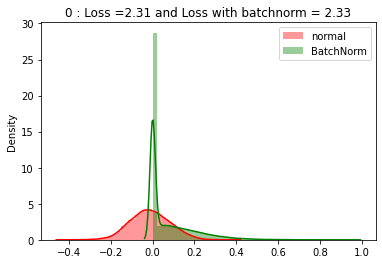

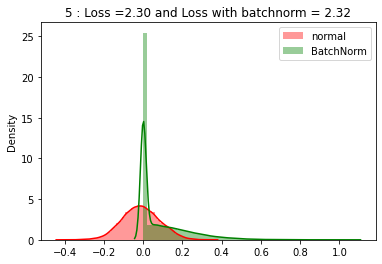

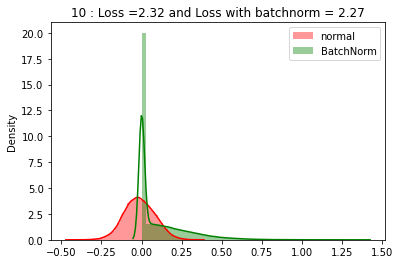

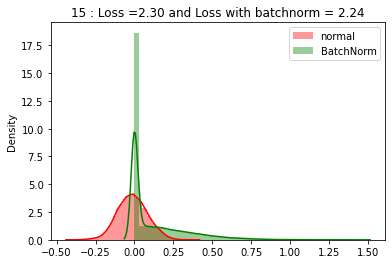

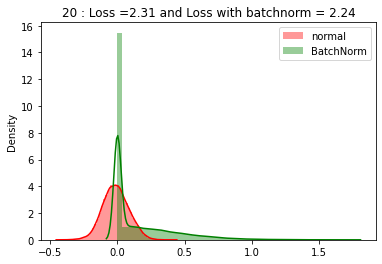

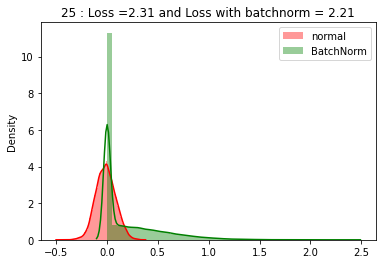

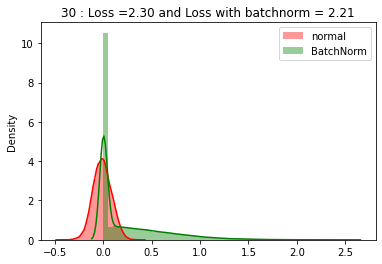

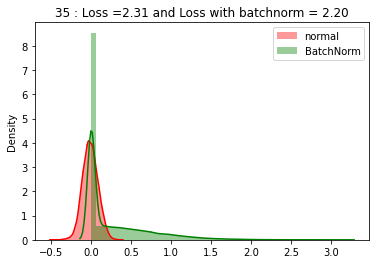

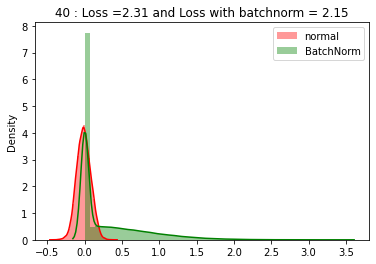

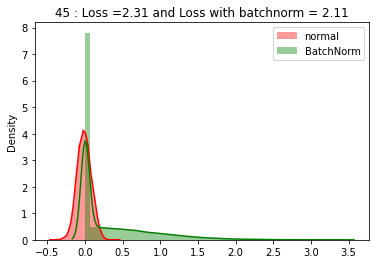

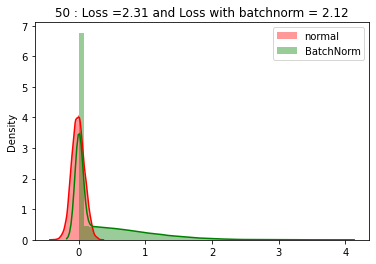

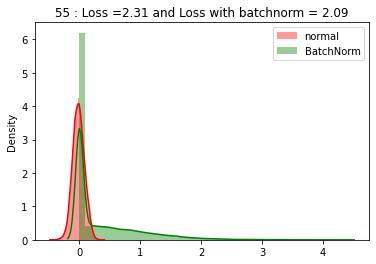

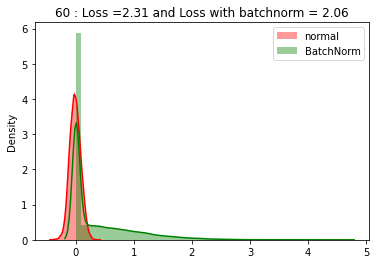

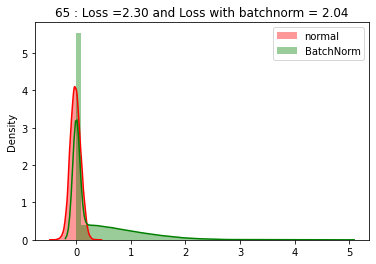

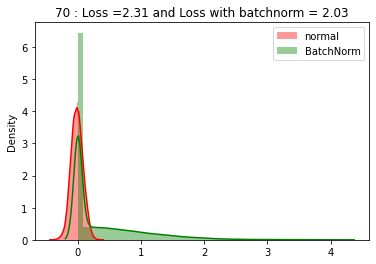

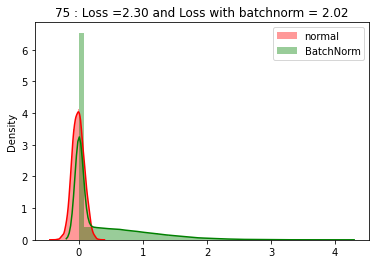

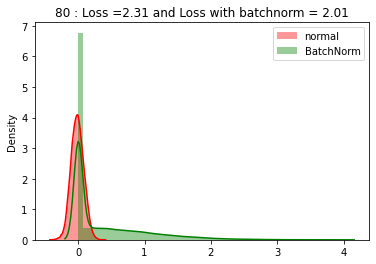

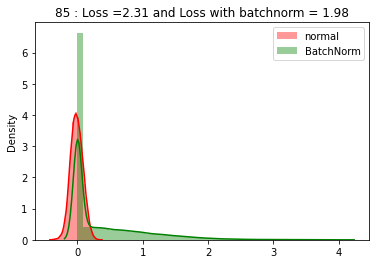

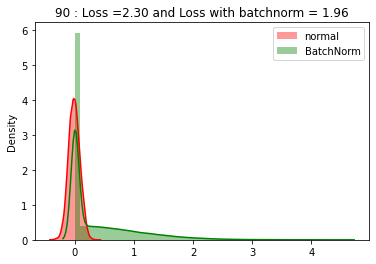

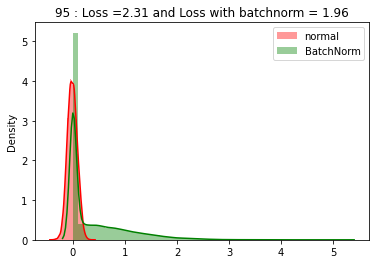

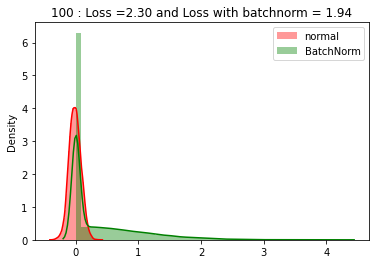

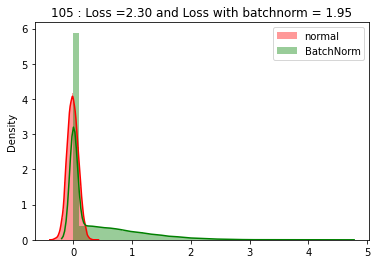

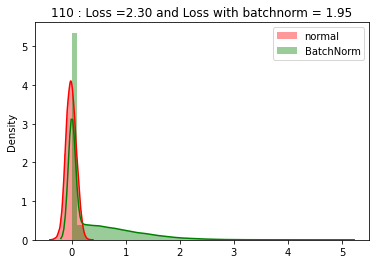

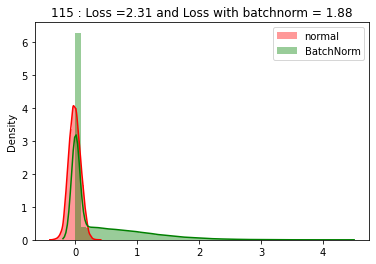

------------------------------------


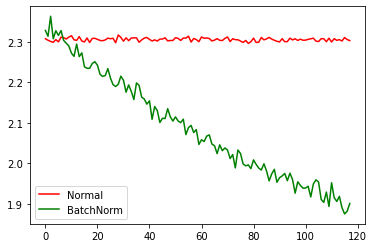

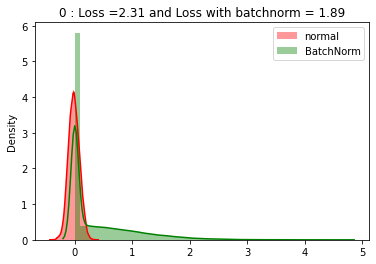

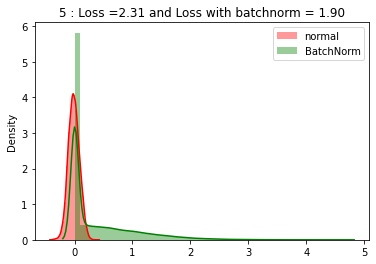

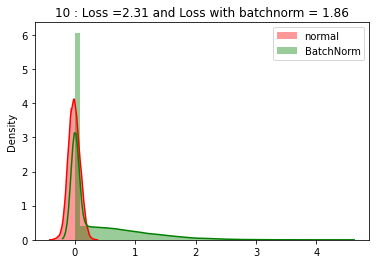

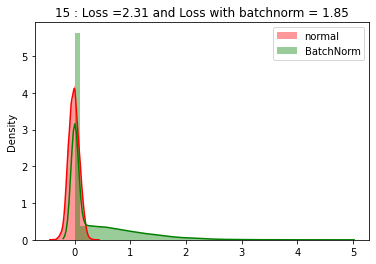

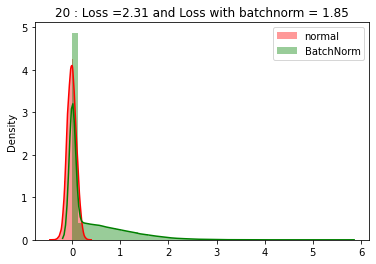

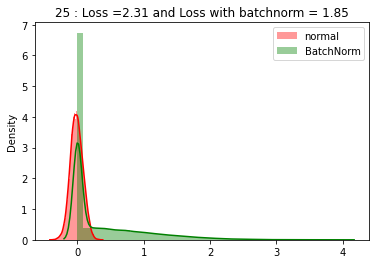

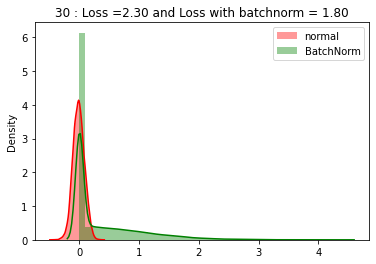

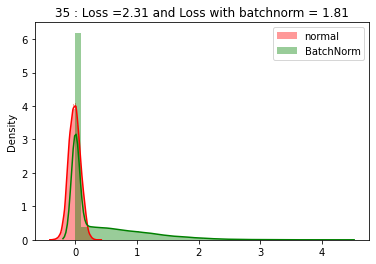

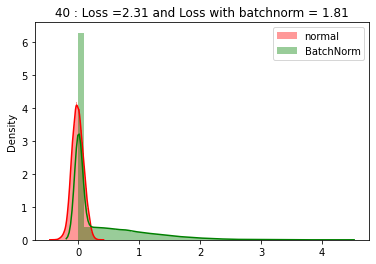

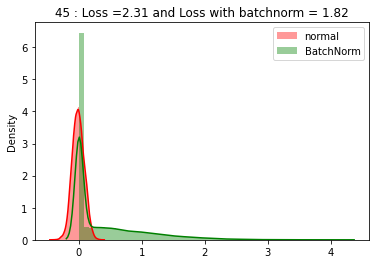

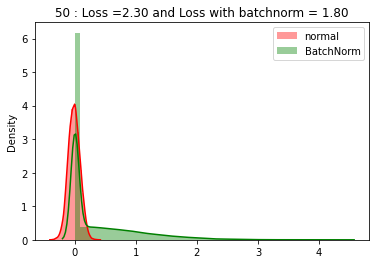

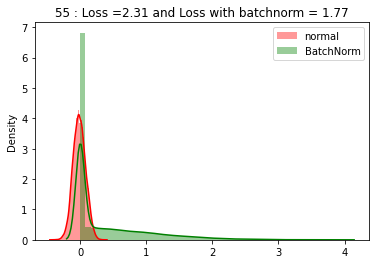

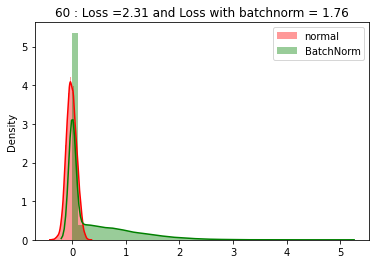

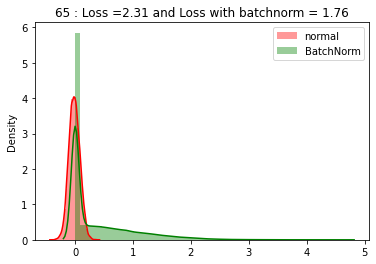

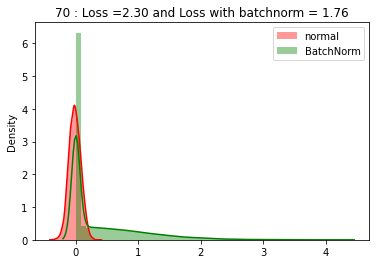

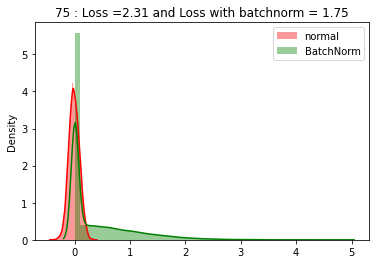

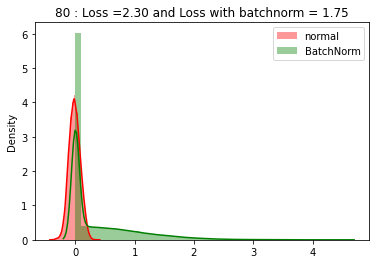

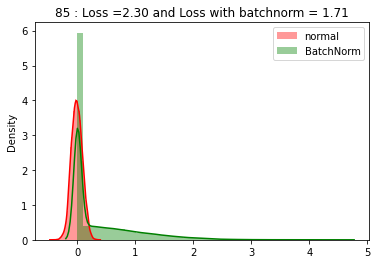

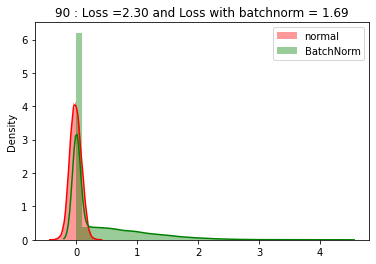

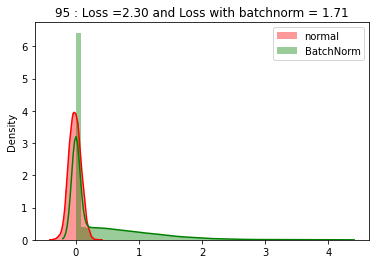

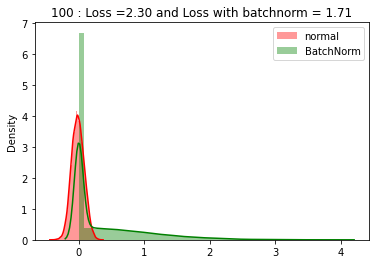

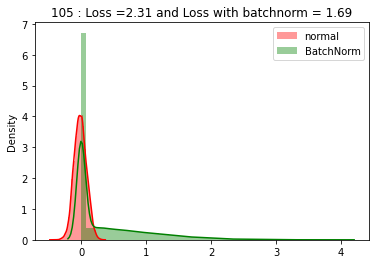

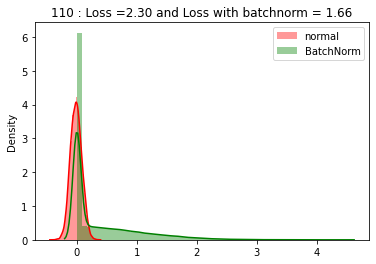

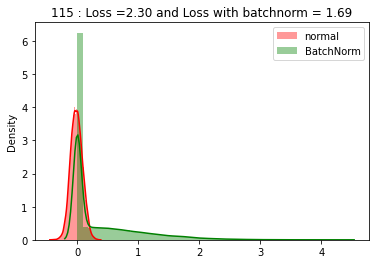

------------------------------------


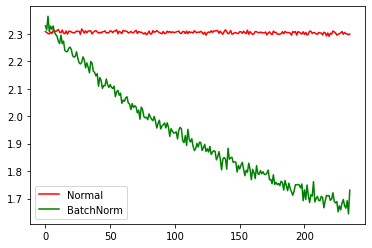

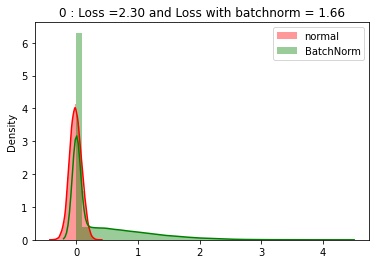

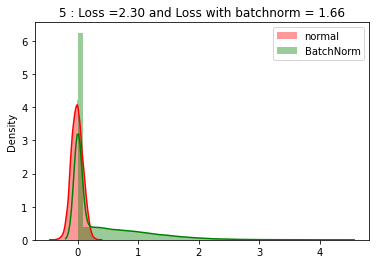

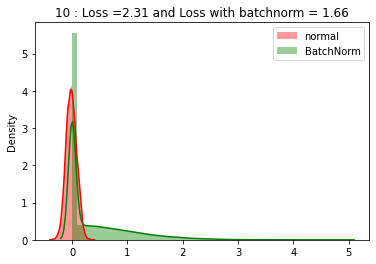

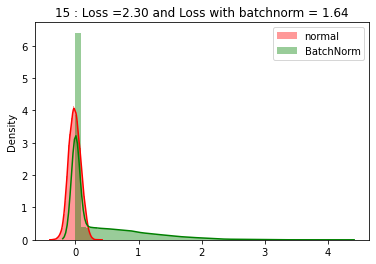

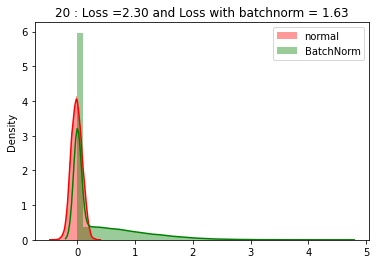

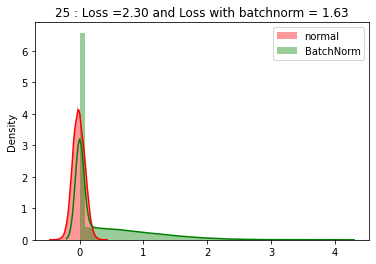

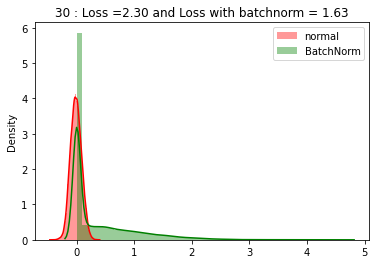

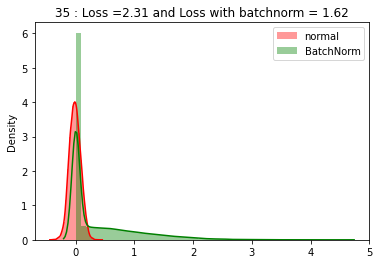

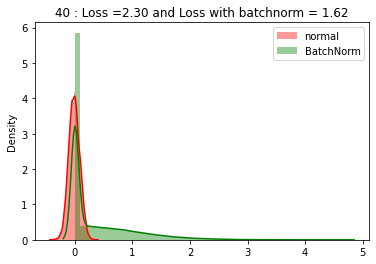

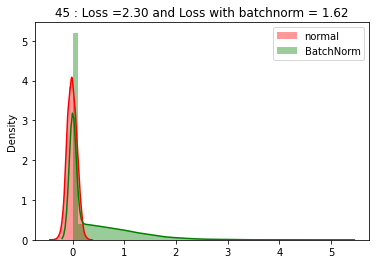

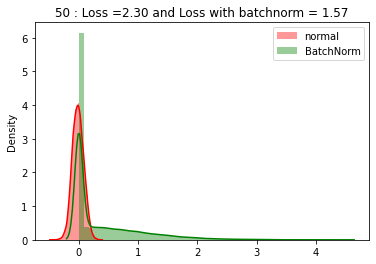

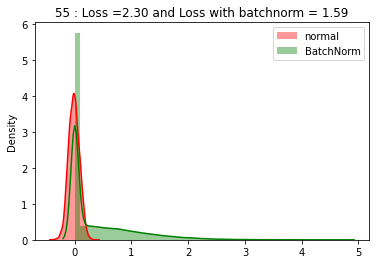

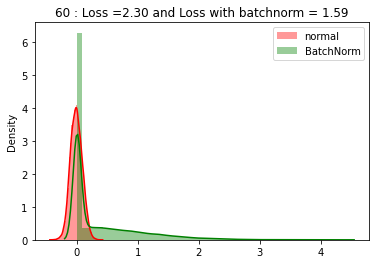

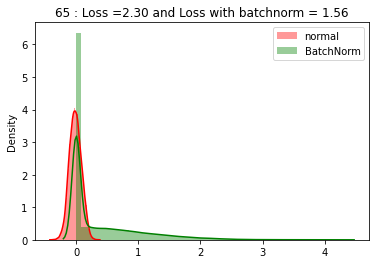

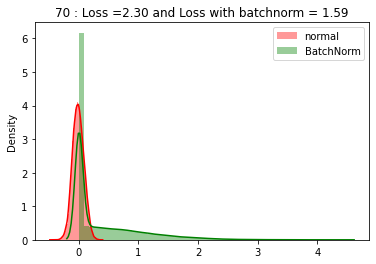

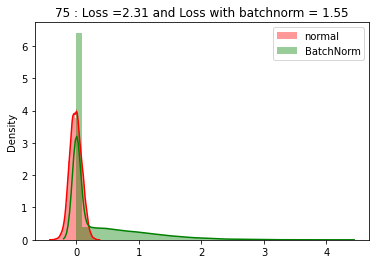

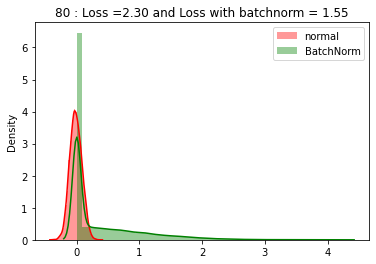

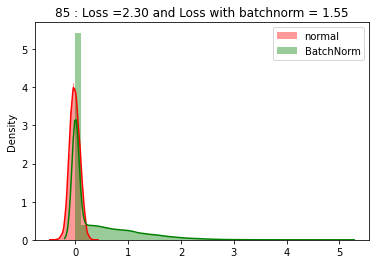

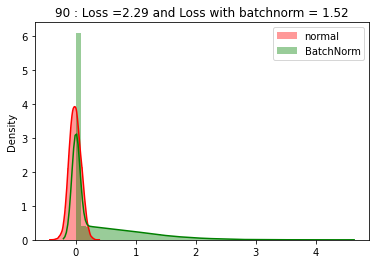

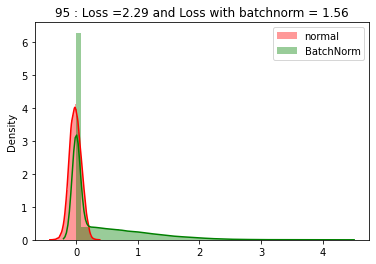

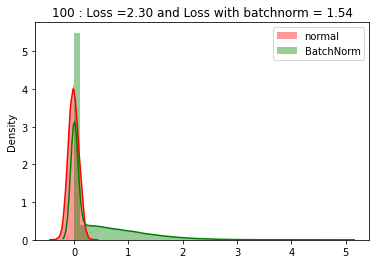

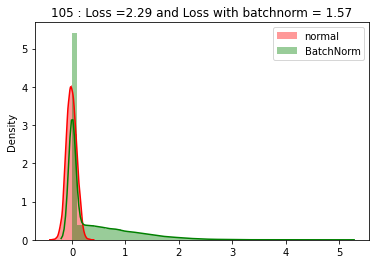

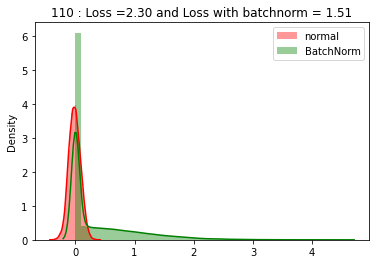

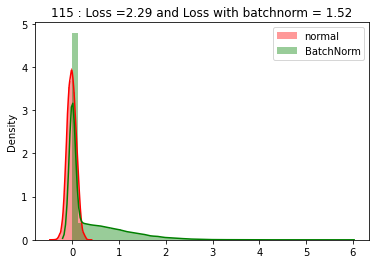

------------------------------------


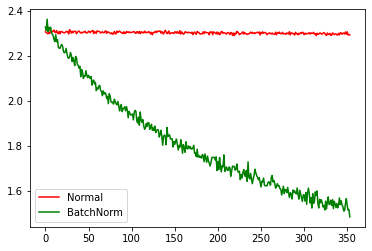

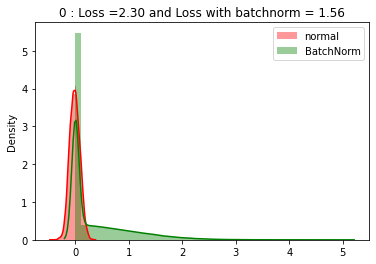

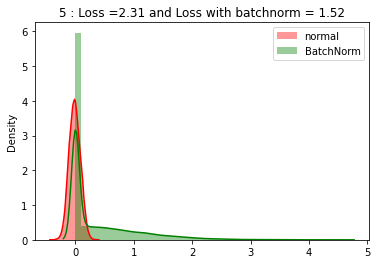

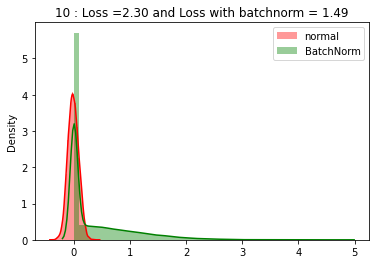

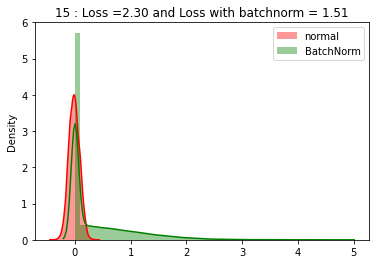

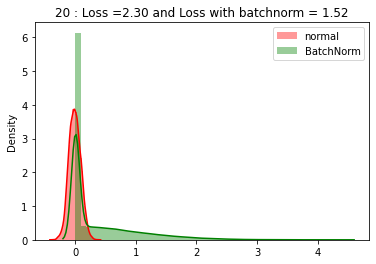

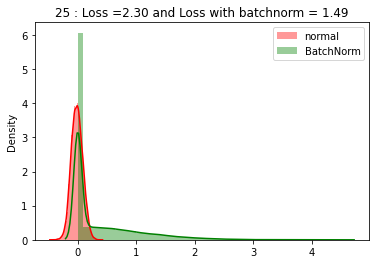

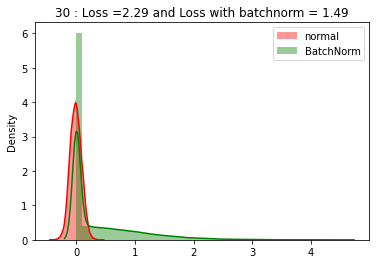

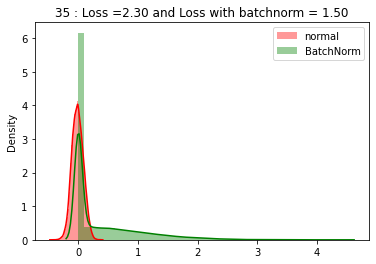

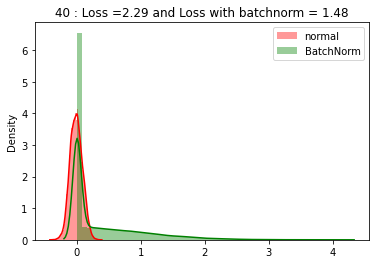

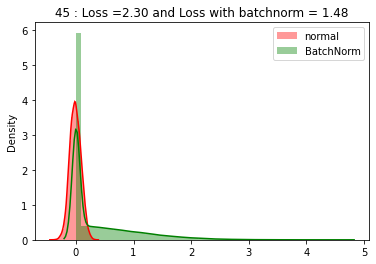

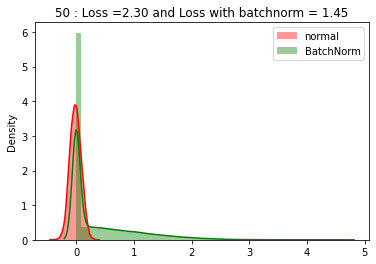

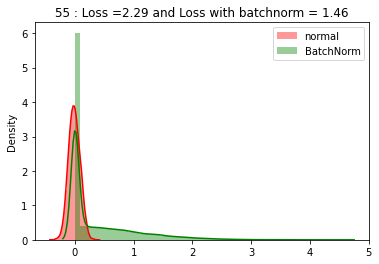

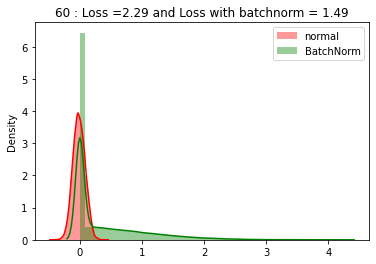

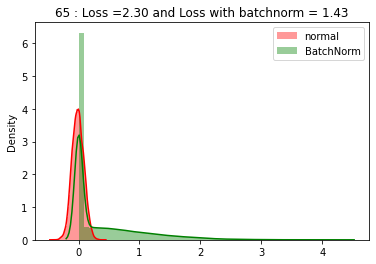

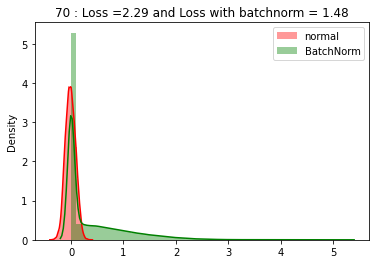

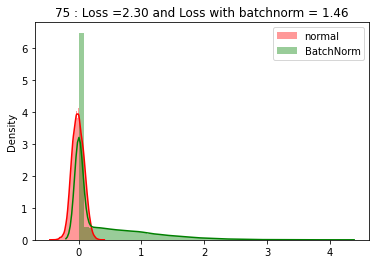

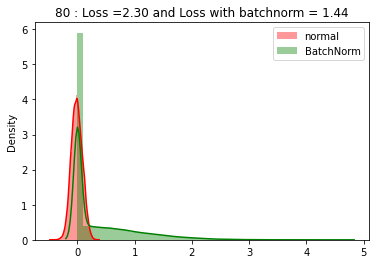

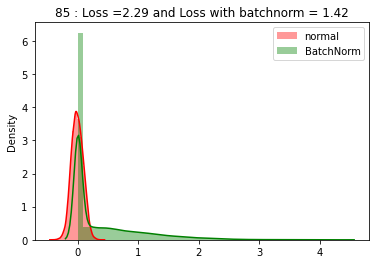

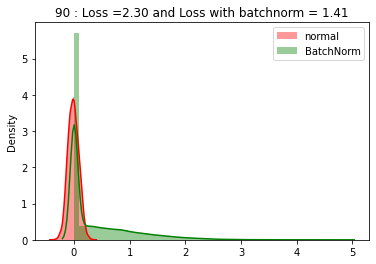

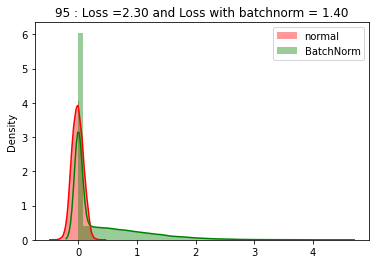

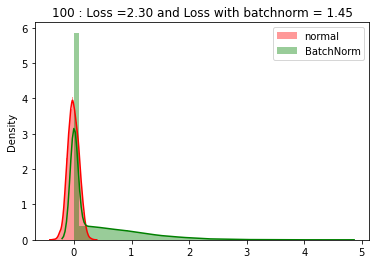

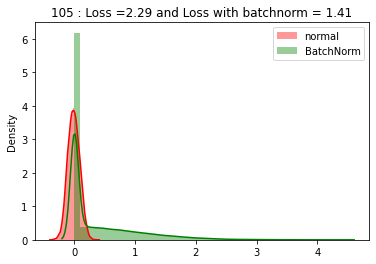

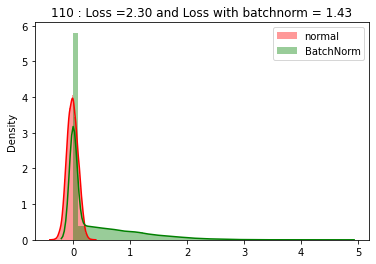

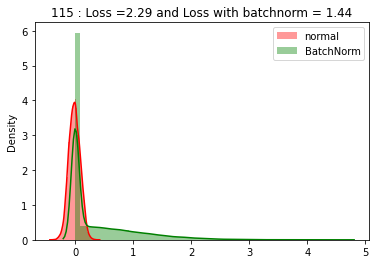

------------------------------------


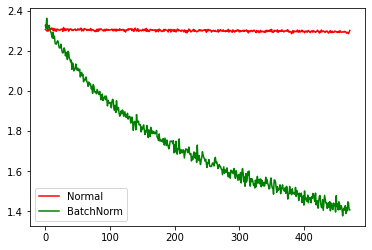

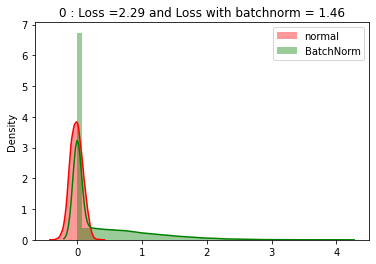

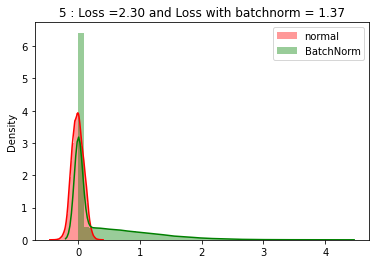

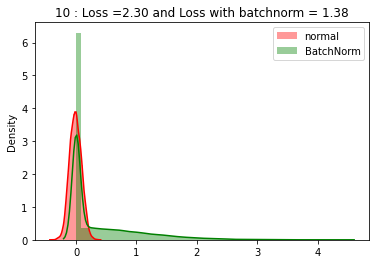

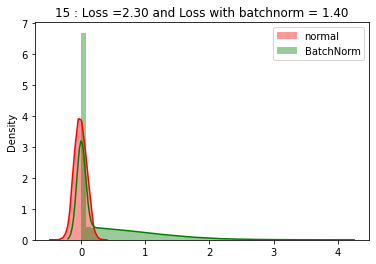

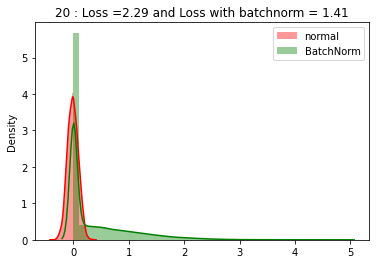

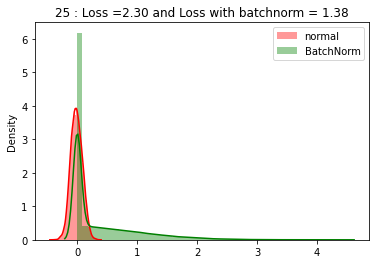

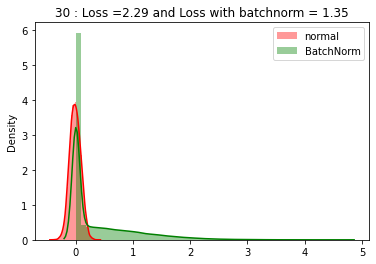

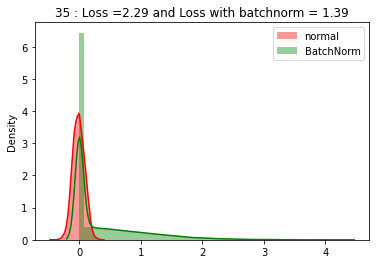

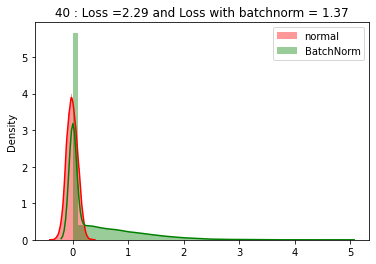

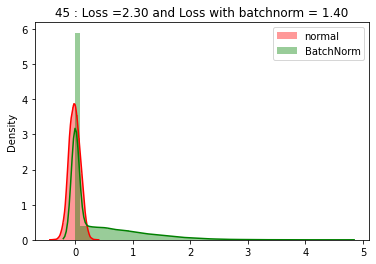

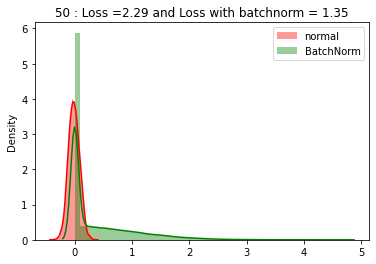

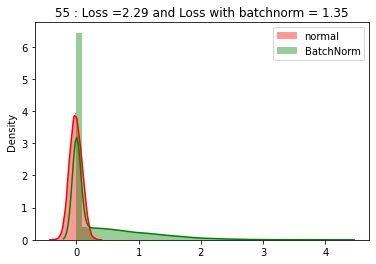

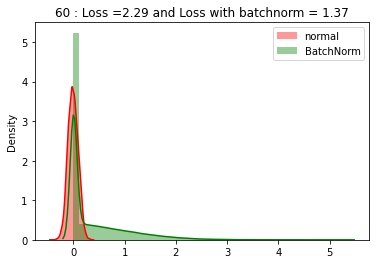

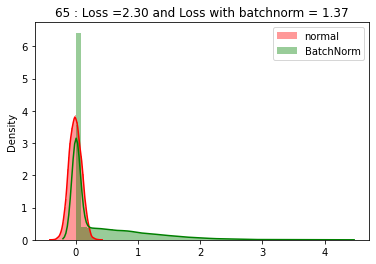

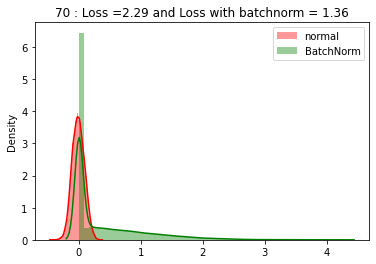

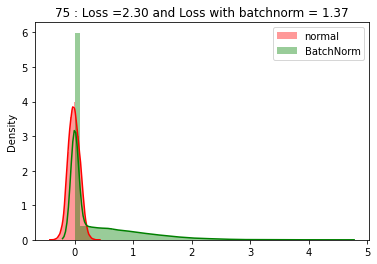

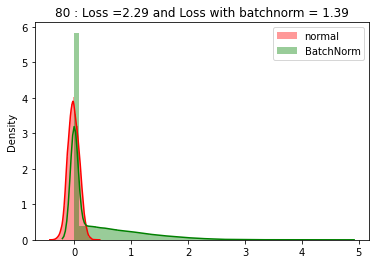

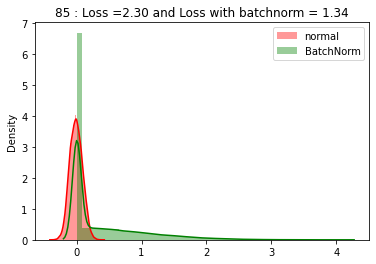

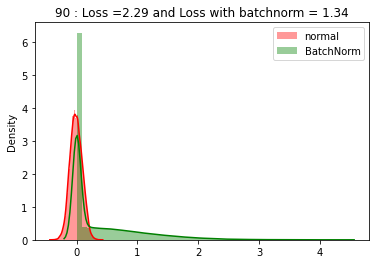

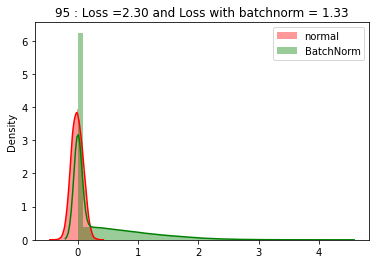

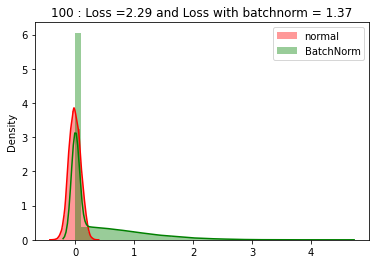

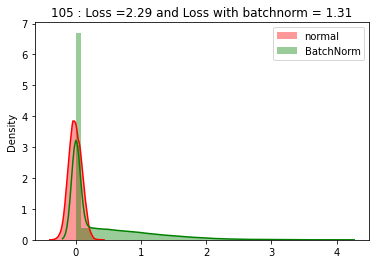

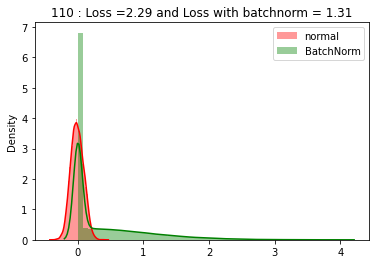

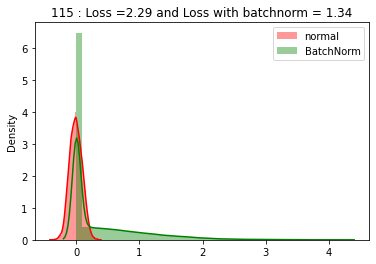

------------------------------------


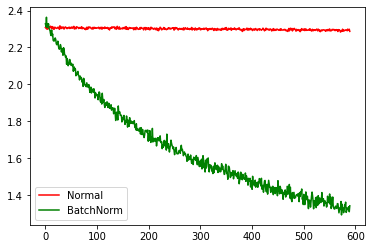

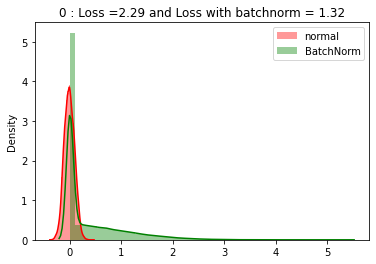

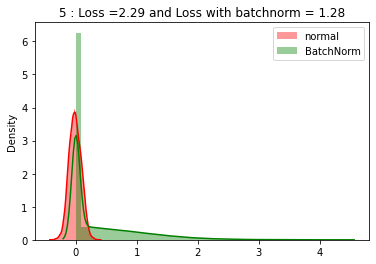

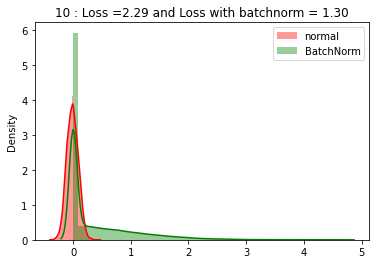

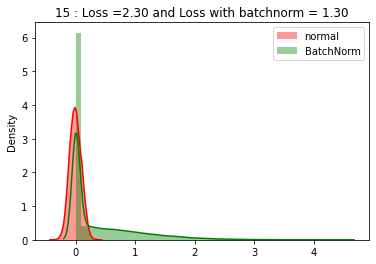

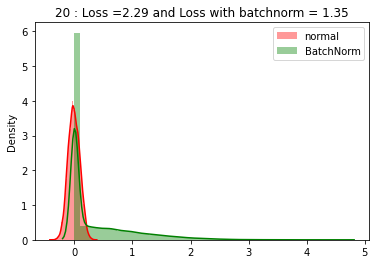

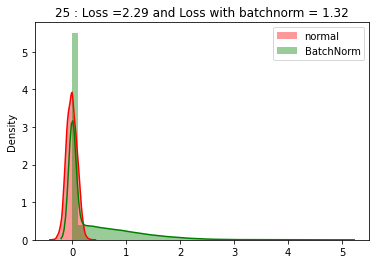

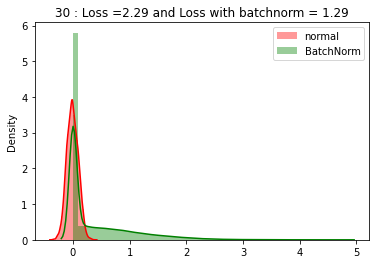

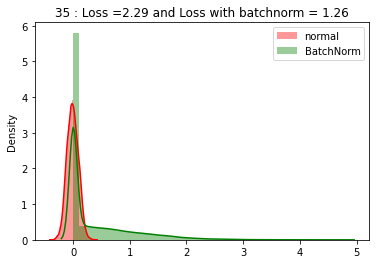

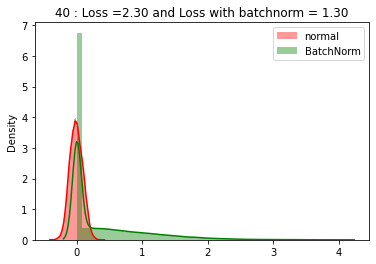

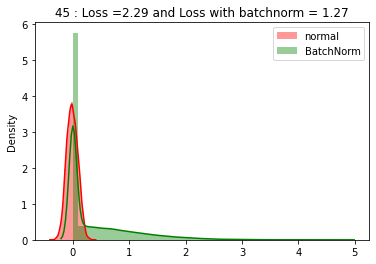

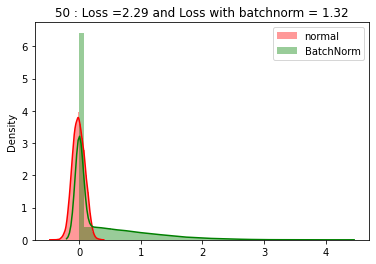

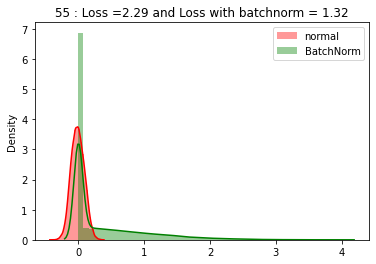

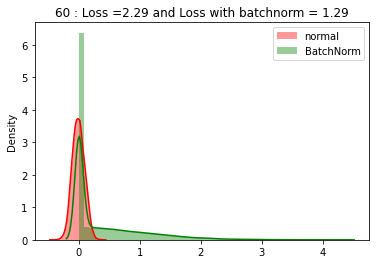

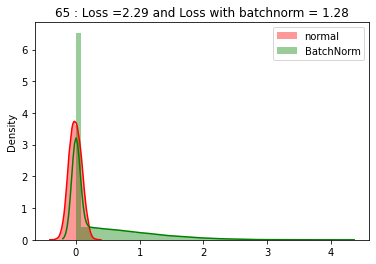

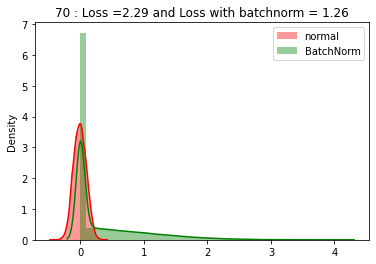

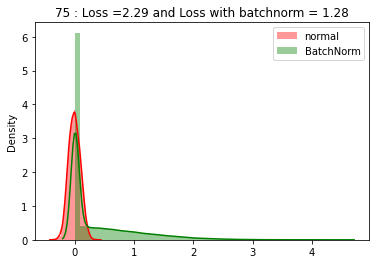

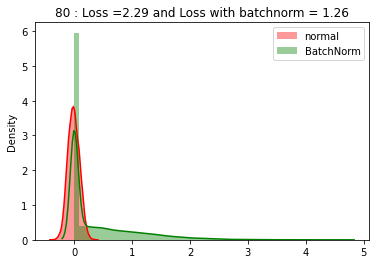

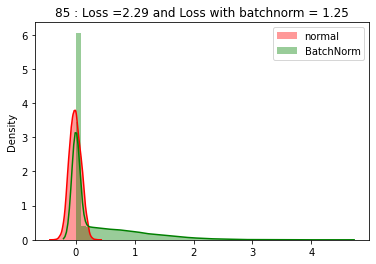

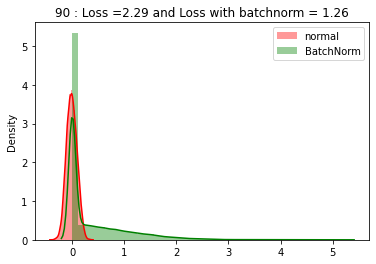

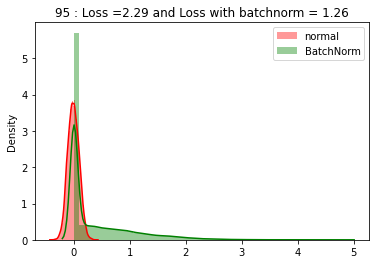

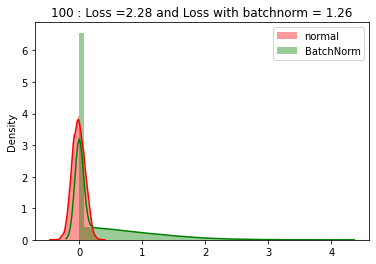

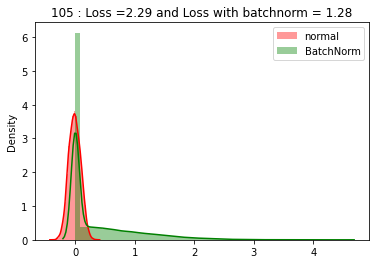

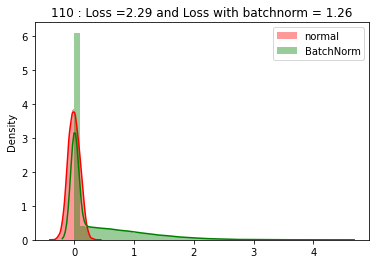

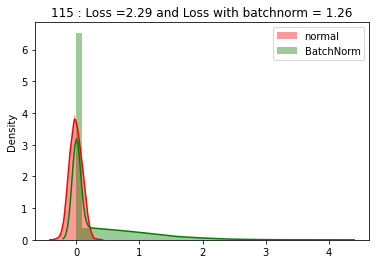

------------------------------------


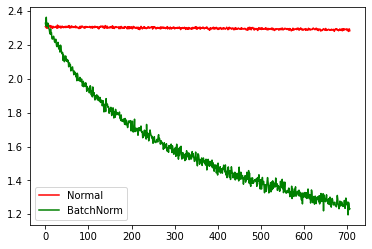

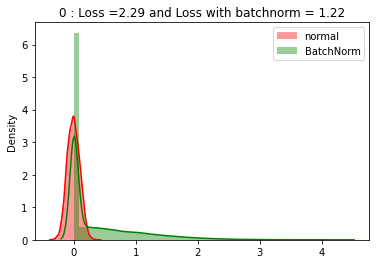

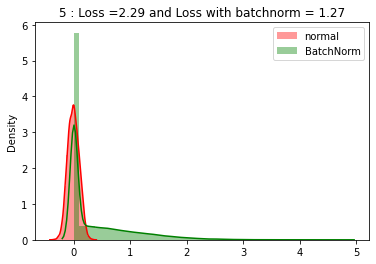

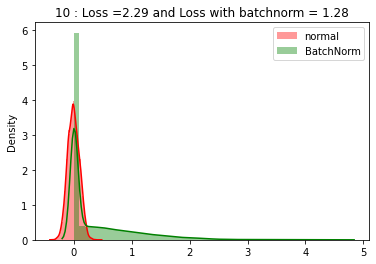

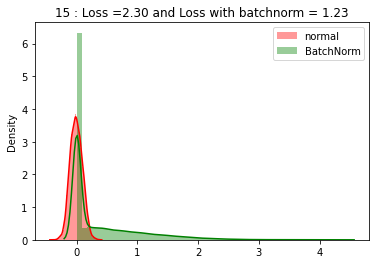

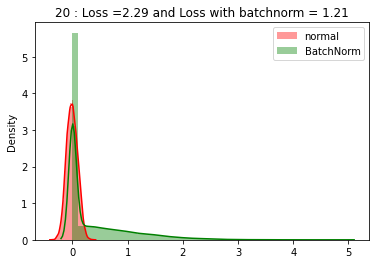

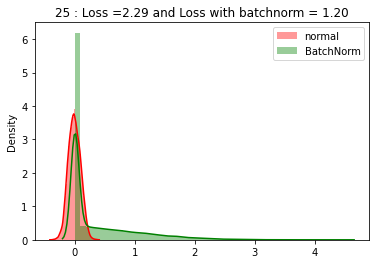

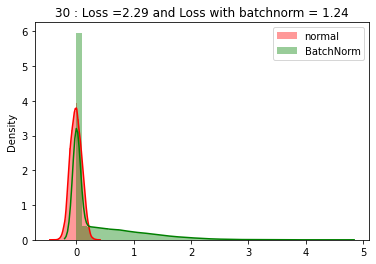

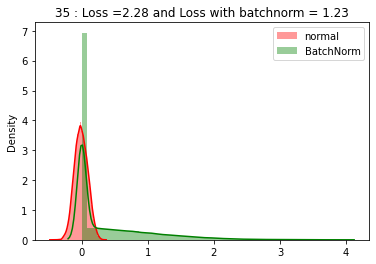

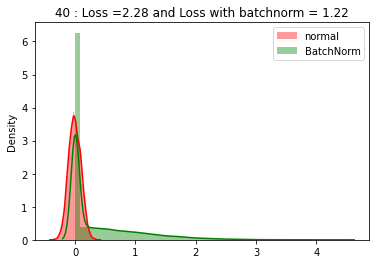

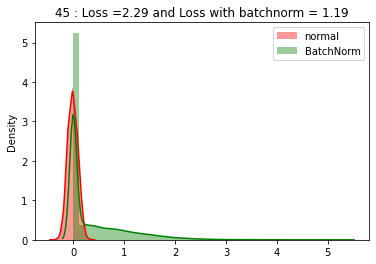

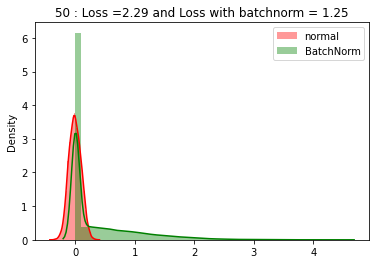

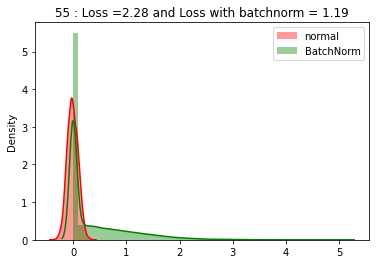

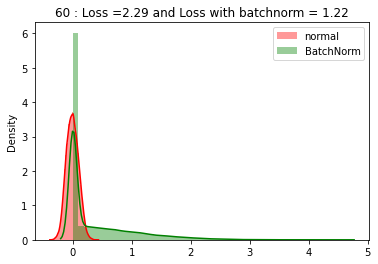

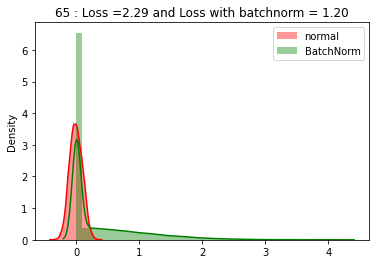

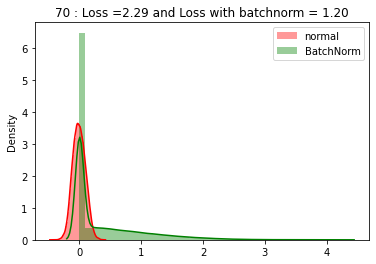

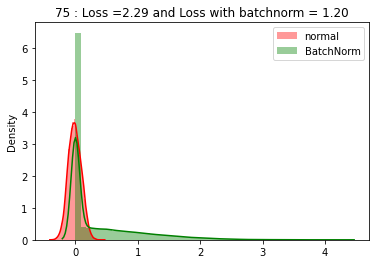

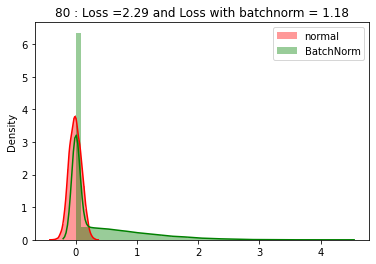

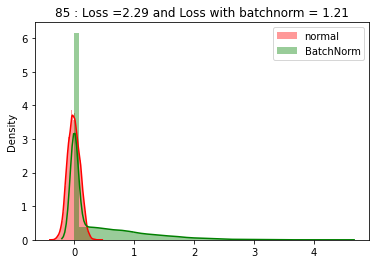

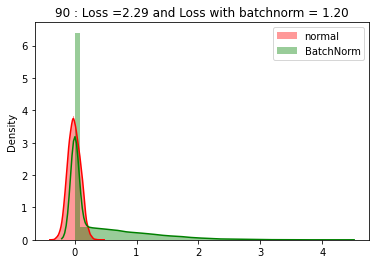

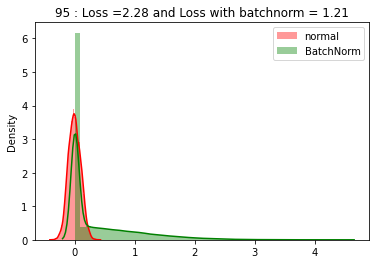

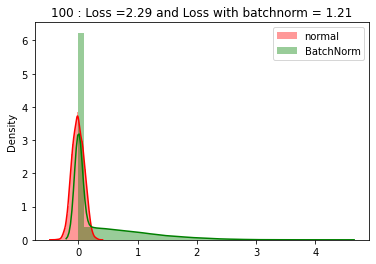

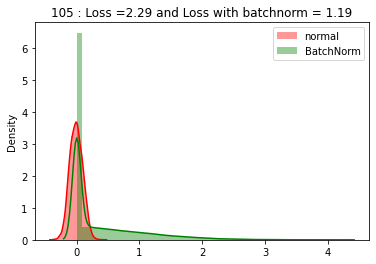

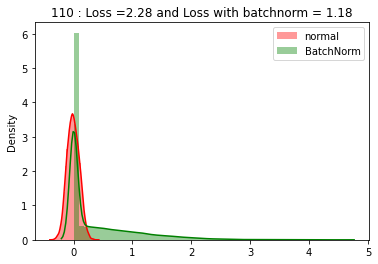

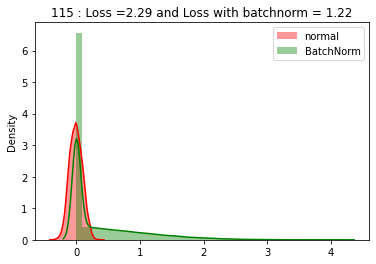

------------------------------------


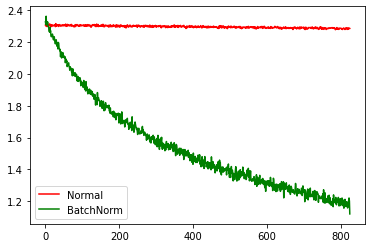

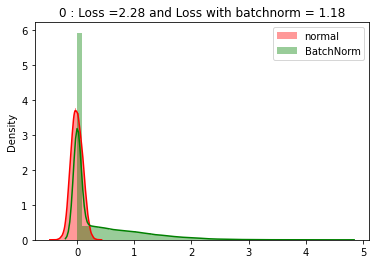

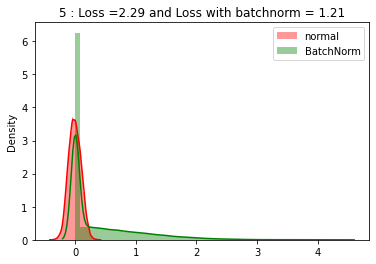

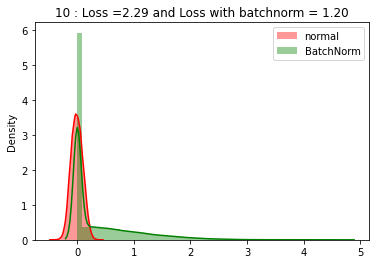

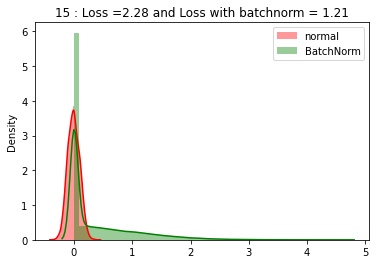

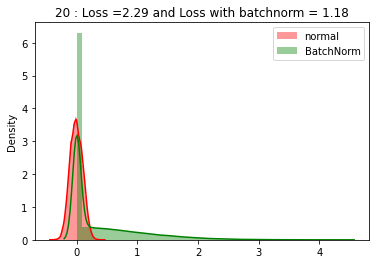

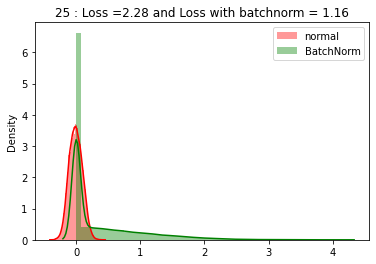

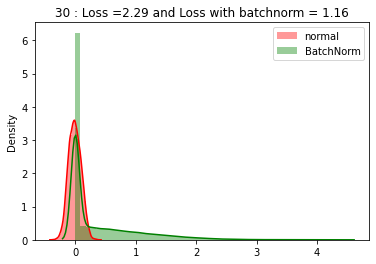

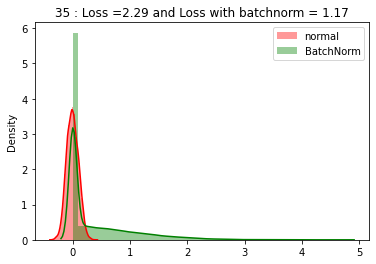

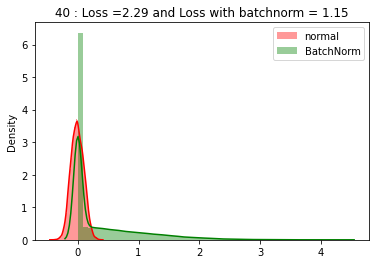

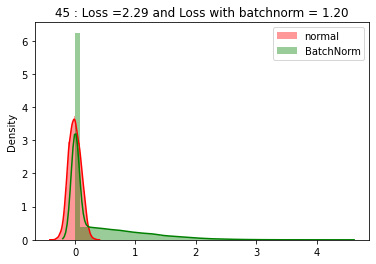

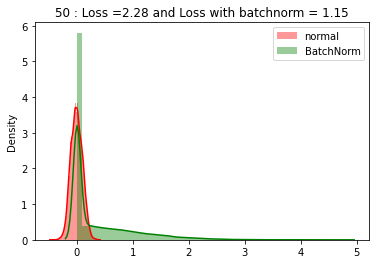

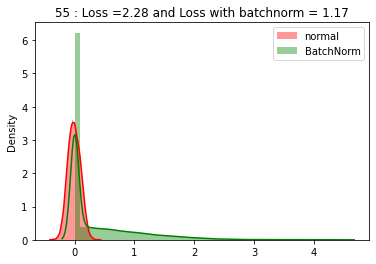

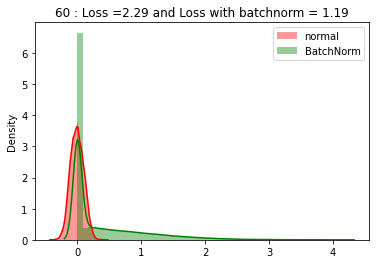

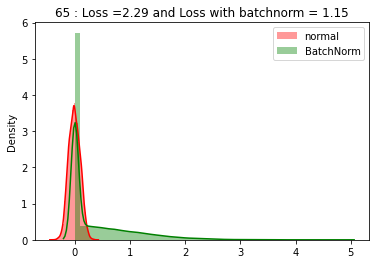

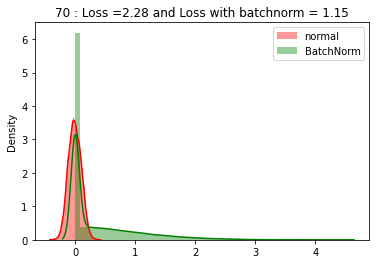

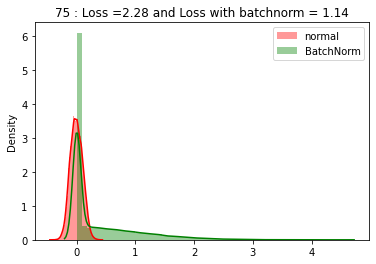

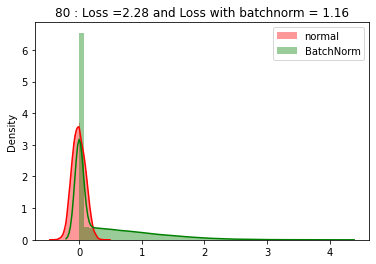

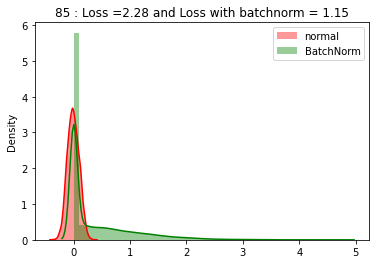

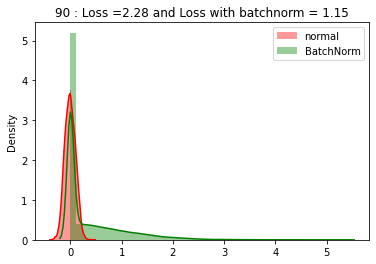

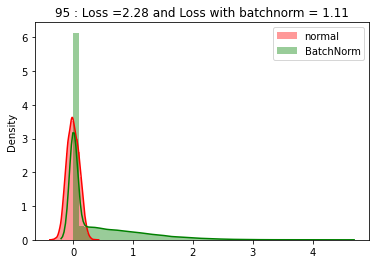

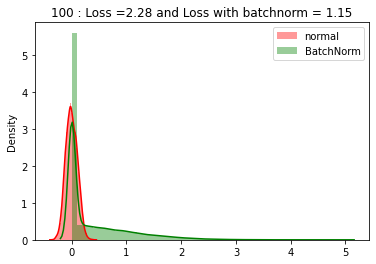

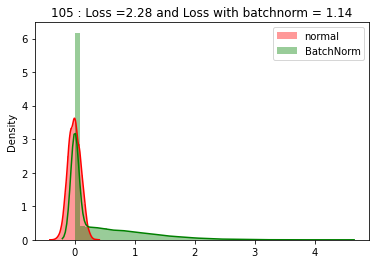

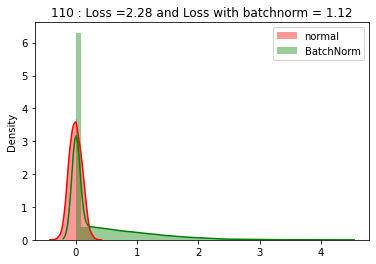

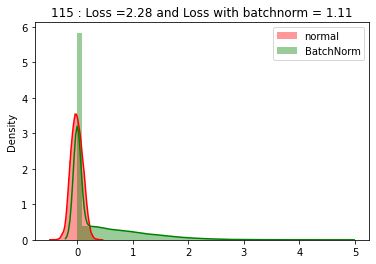

------------------------------------


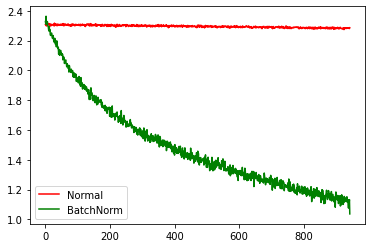

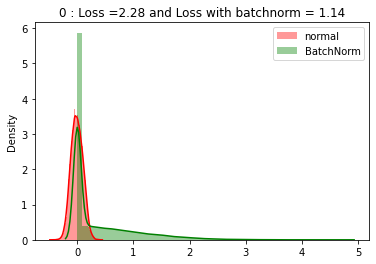

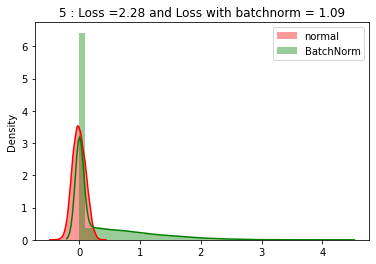

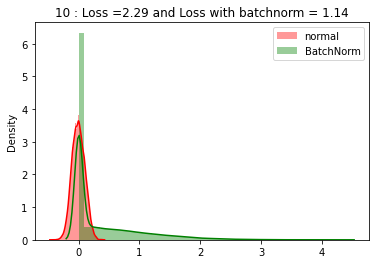

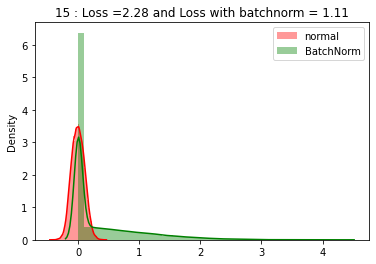

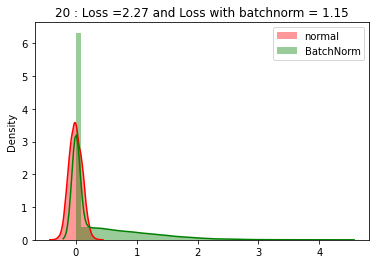

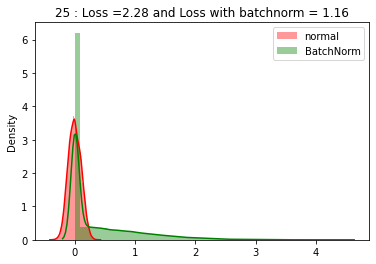

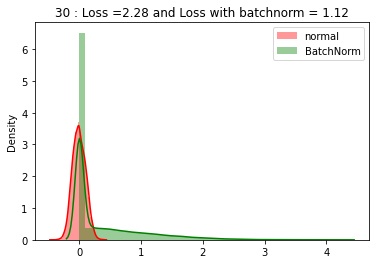

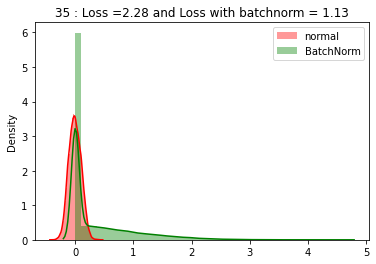

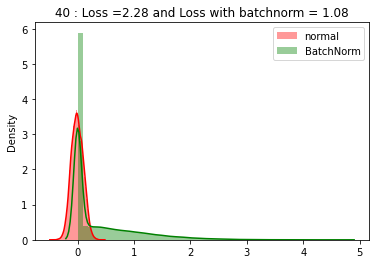

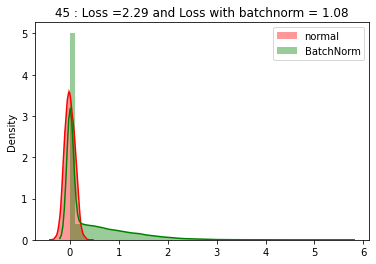

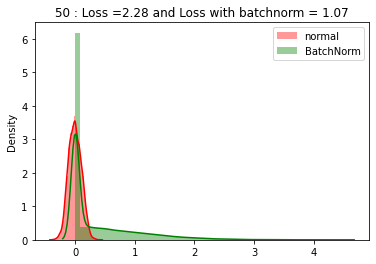

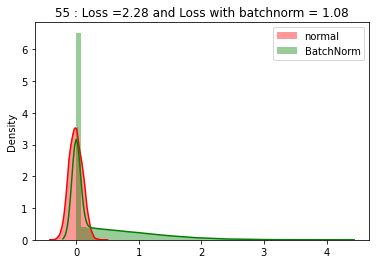

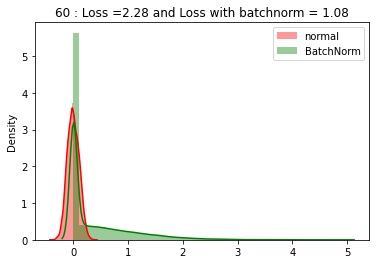

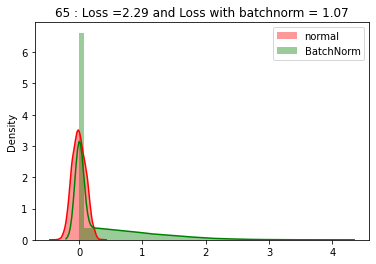

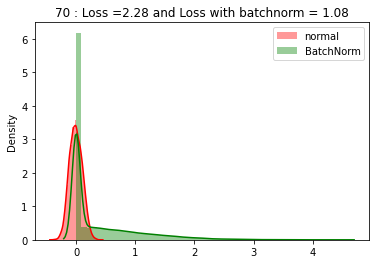

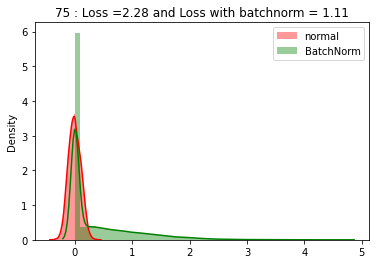

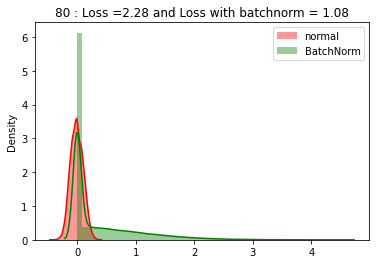

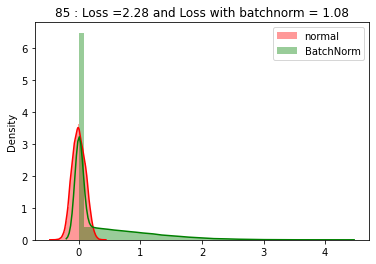

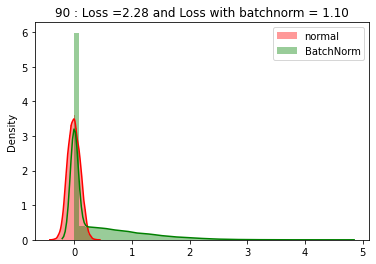

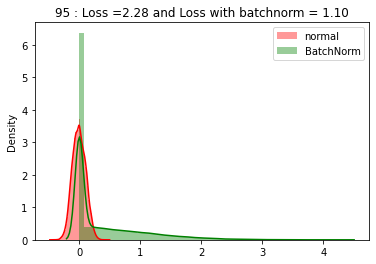

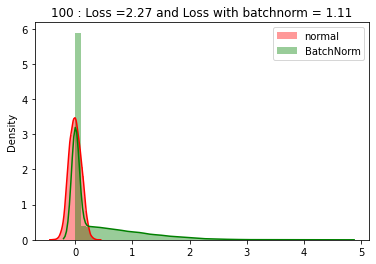

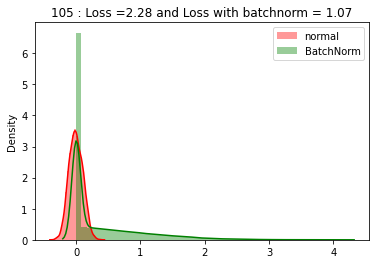

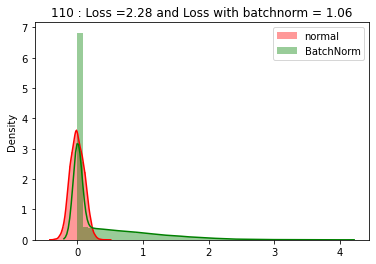

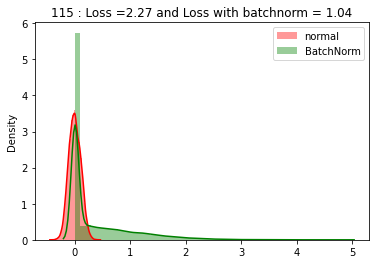

------------------------------------


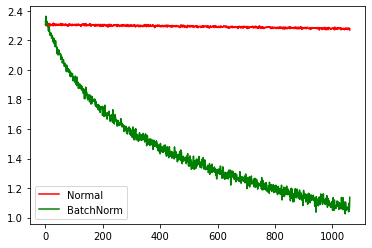

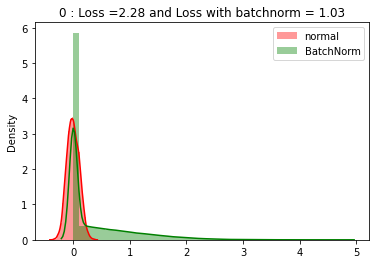

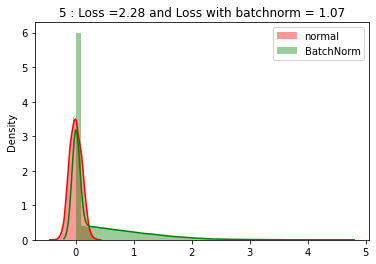

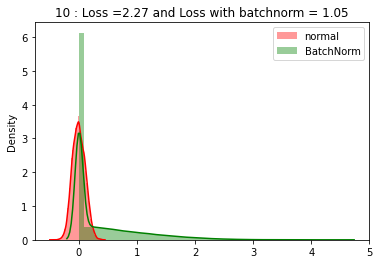

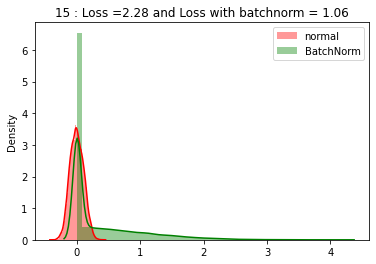

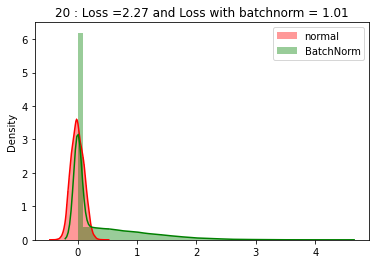

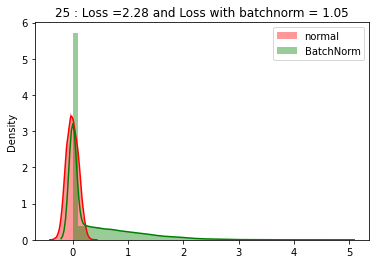

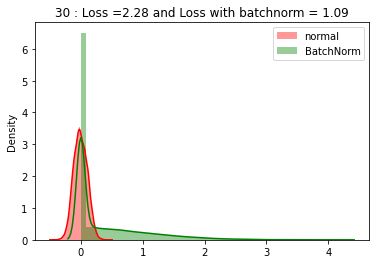

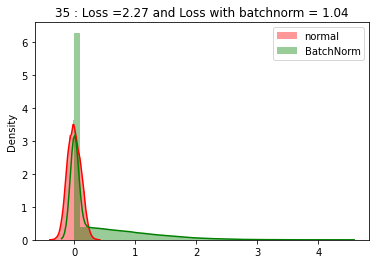

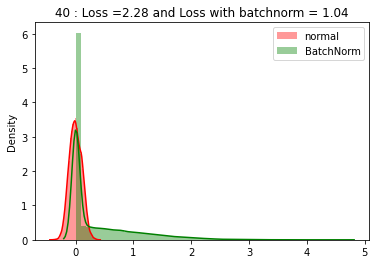

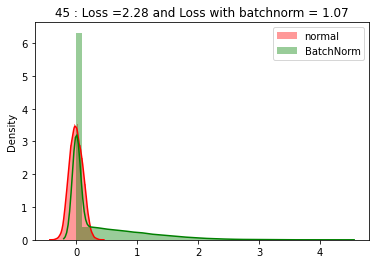

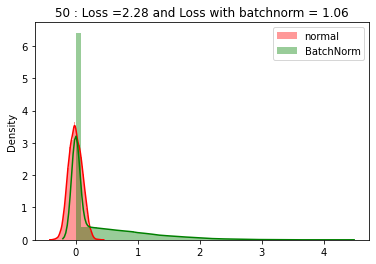

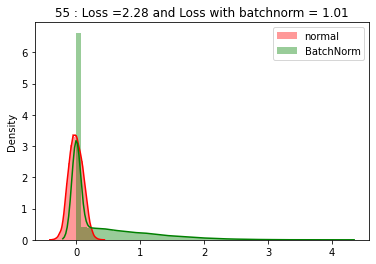

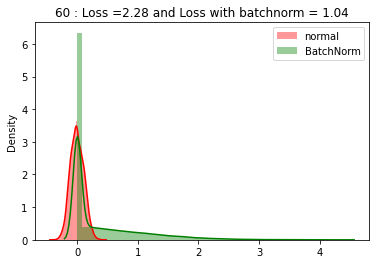

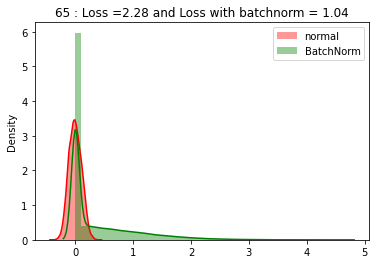

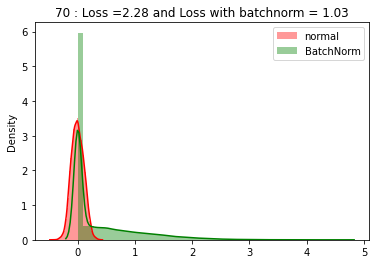

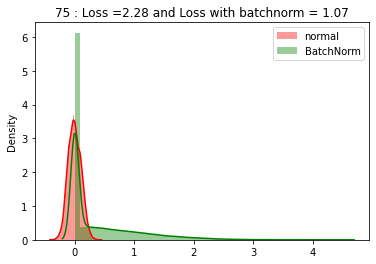

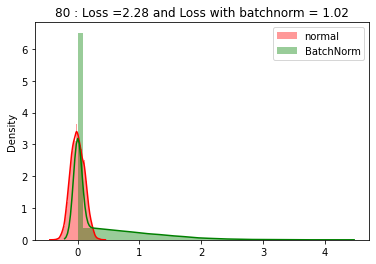

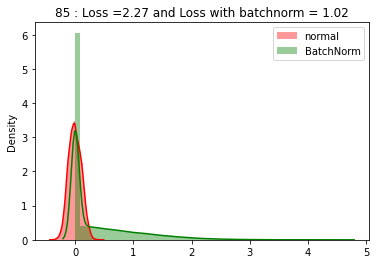

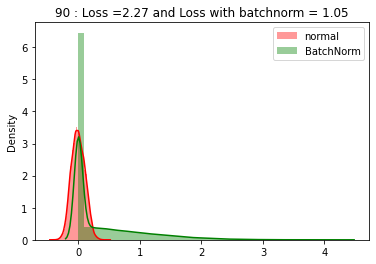

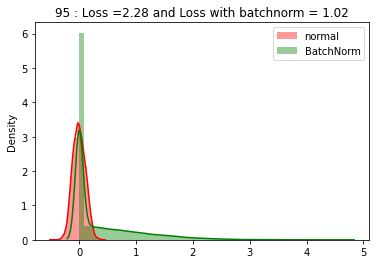

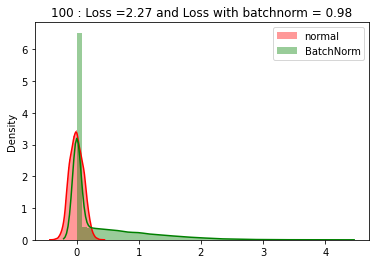

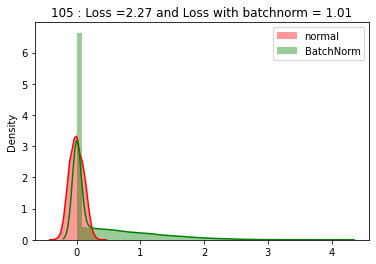

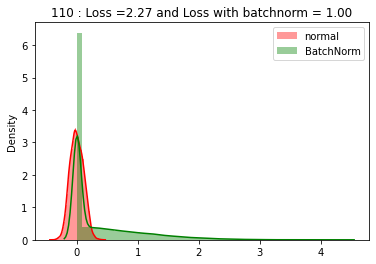

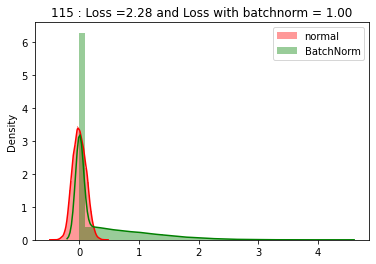

------------------------------------


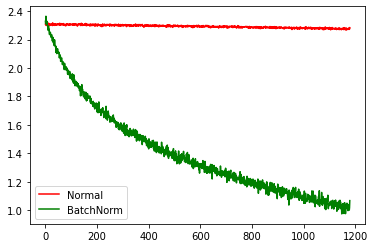

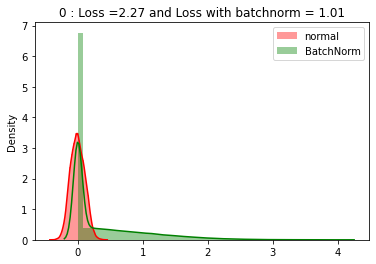

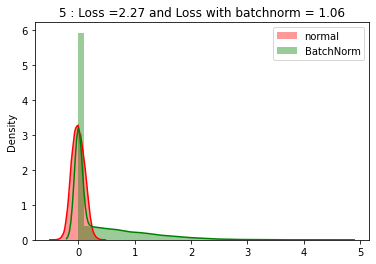

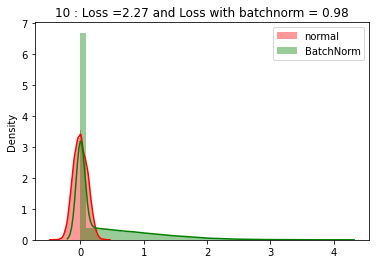

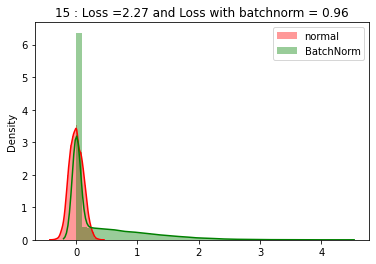

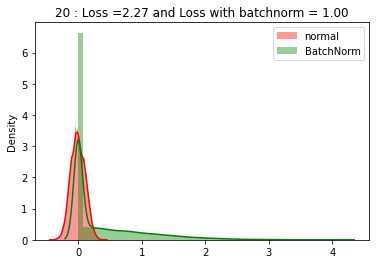

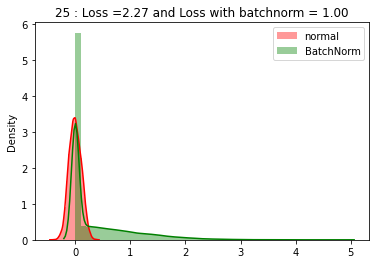

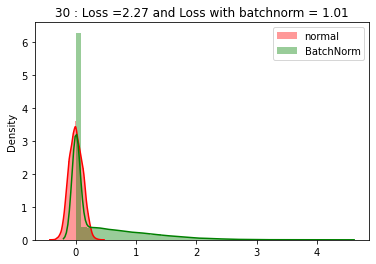

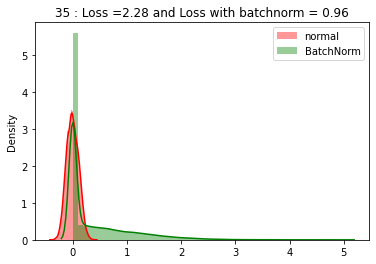

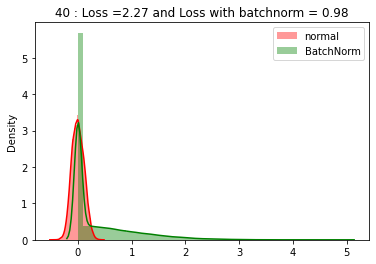

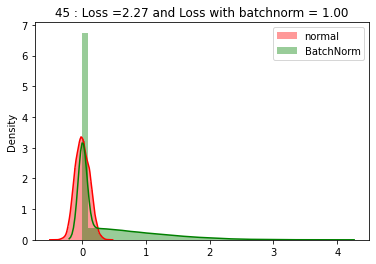

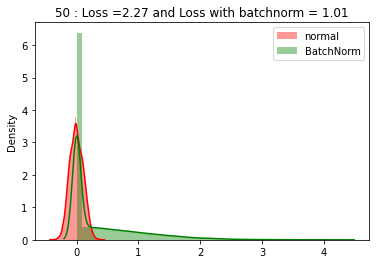

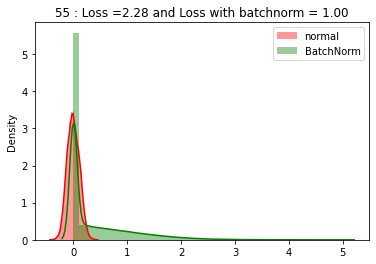

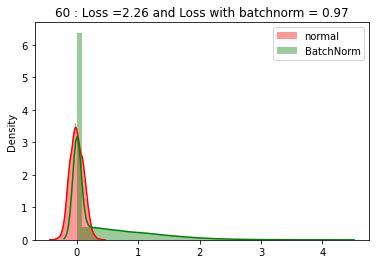

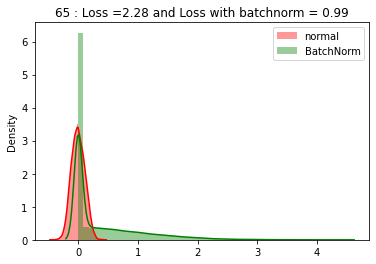

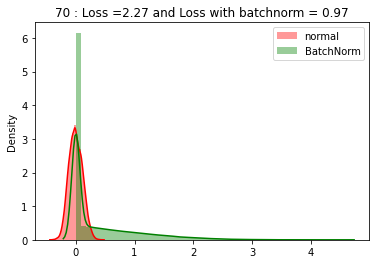

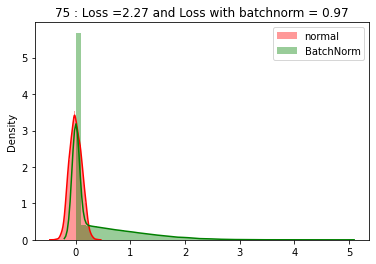

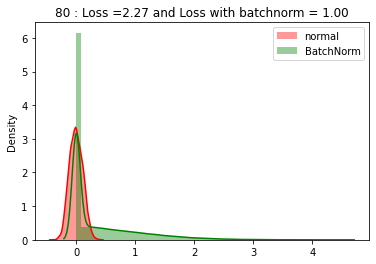

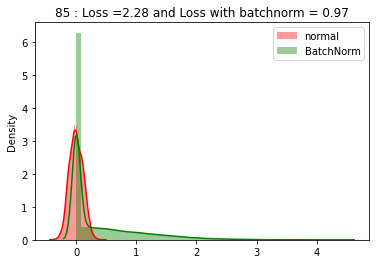

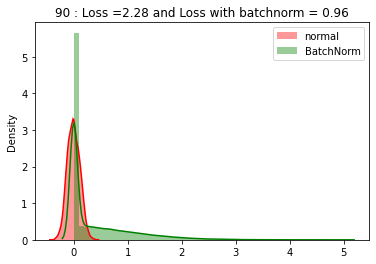

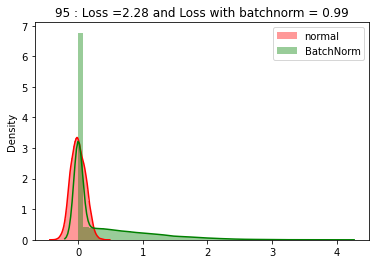

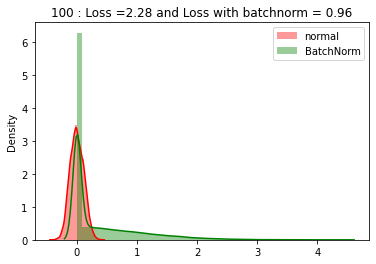

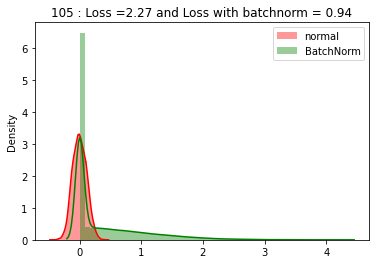

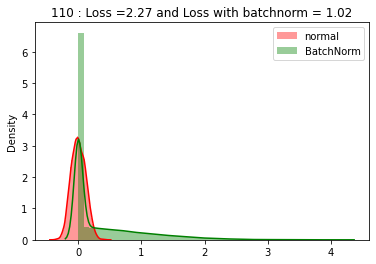

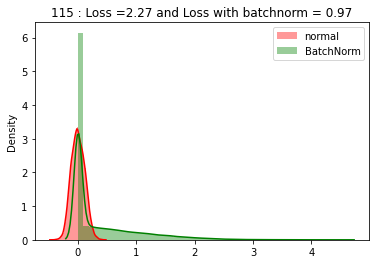

------------------------------------


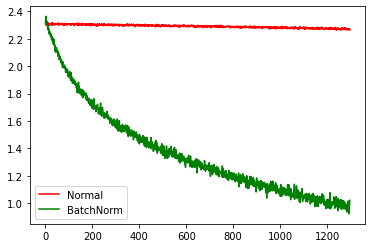

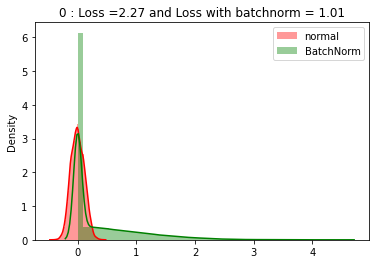

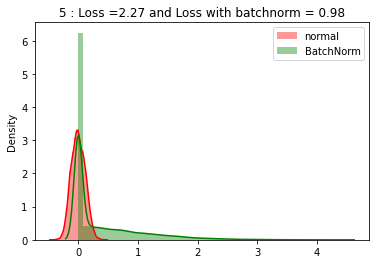

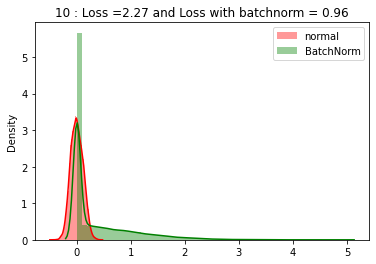

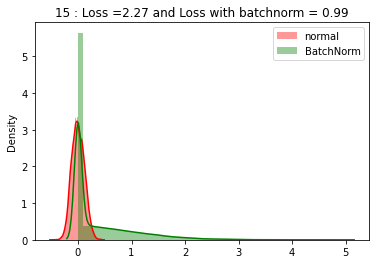

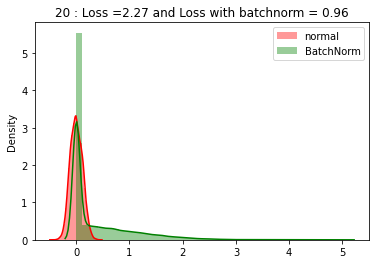

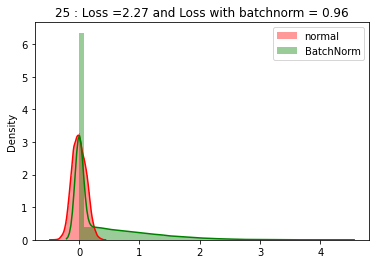

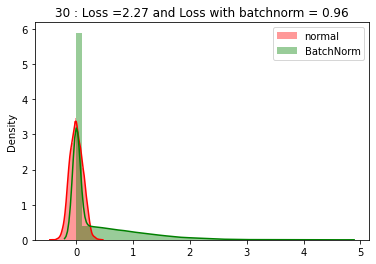

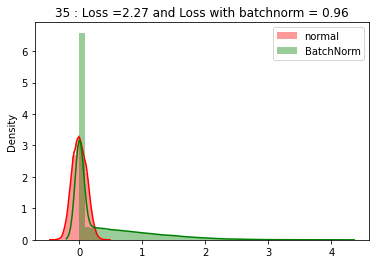

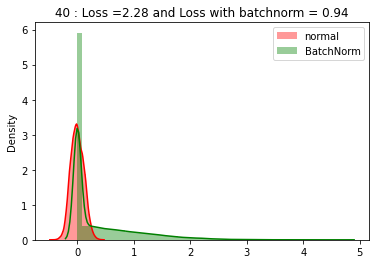

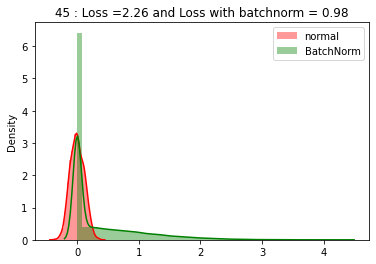

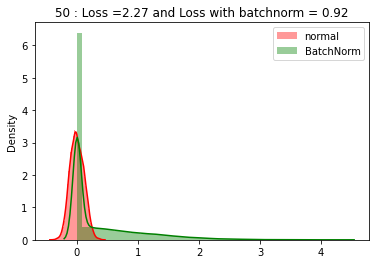

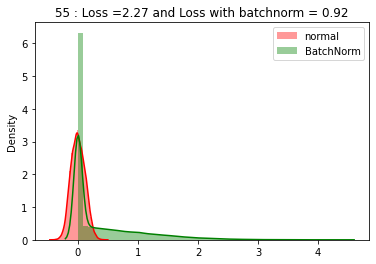

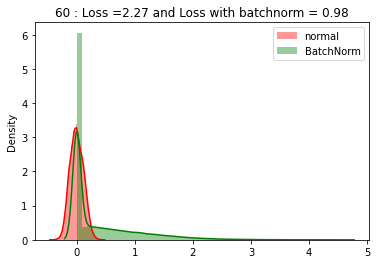

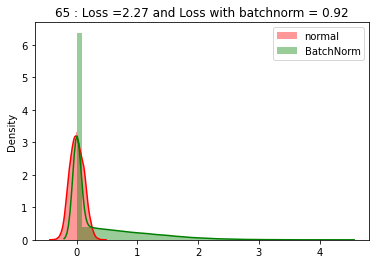

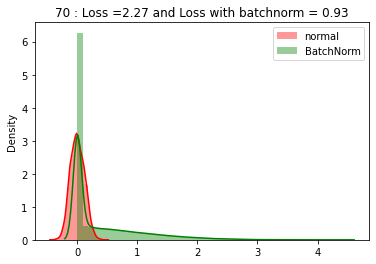

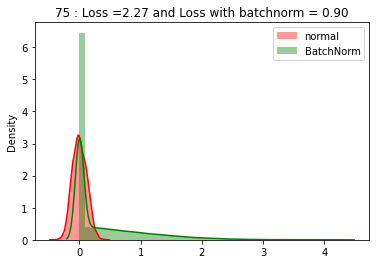

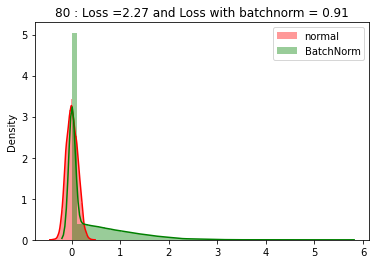

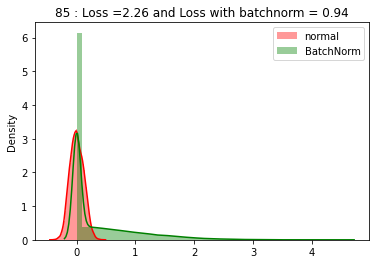

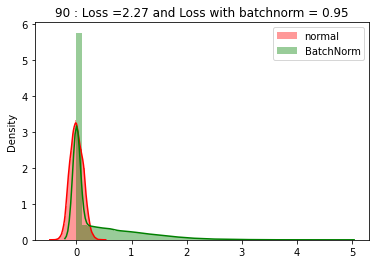

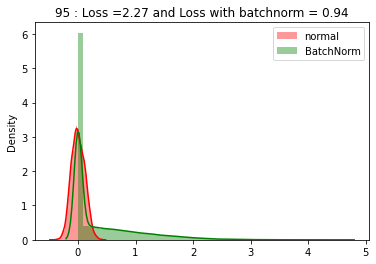

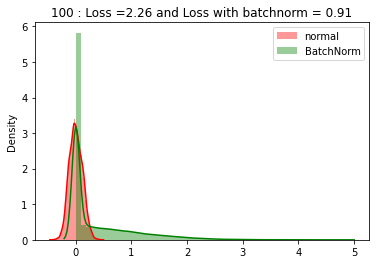

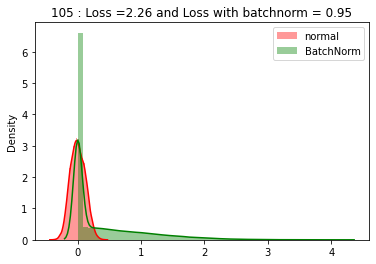

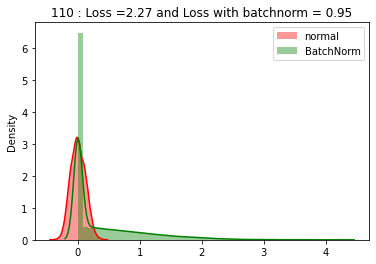

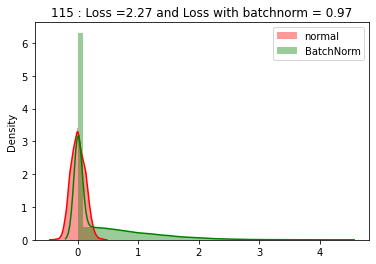

------------------------------------


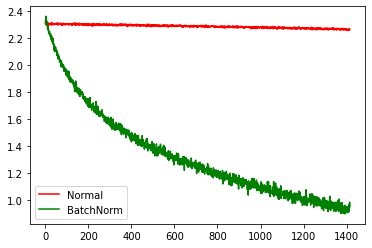

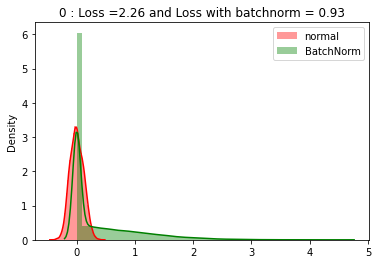

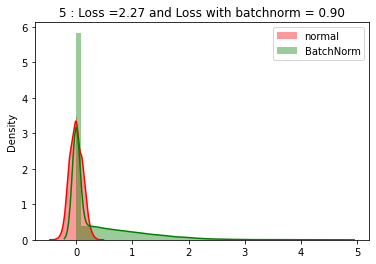

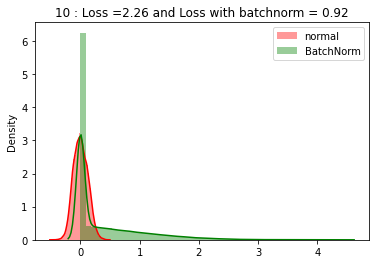

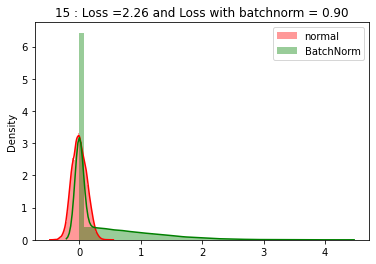

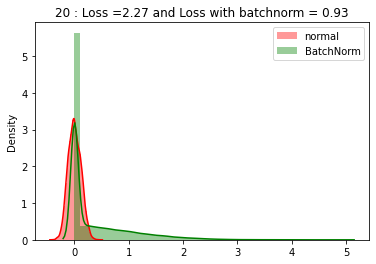

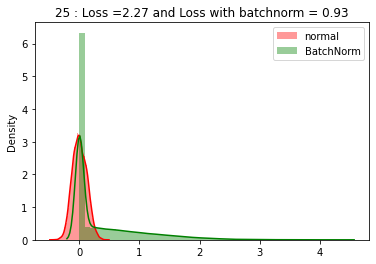

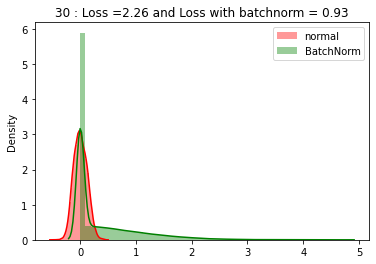

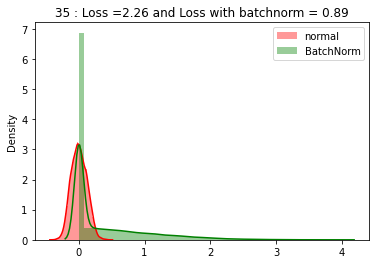

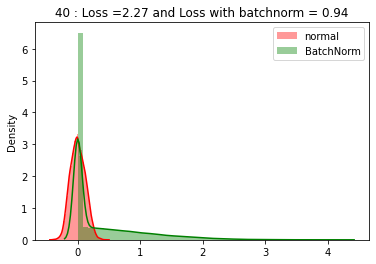

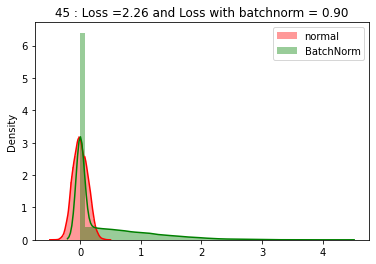

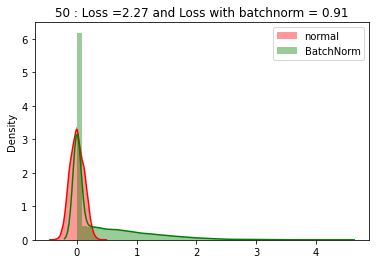

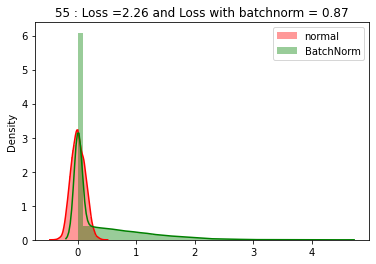

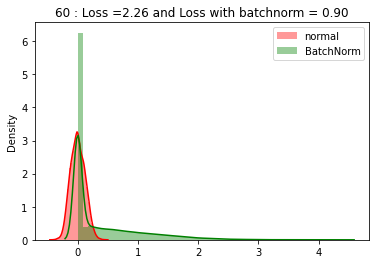

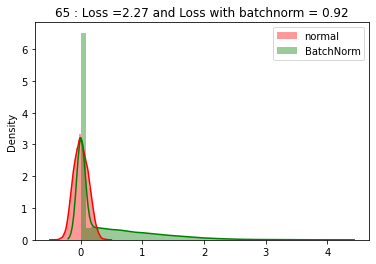

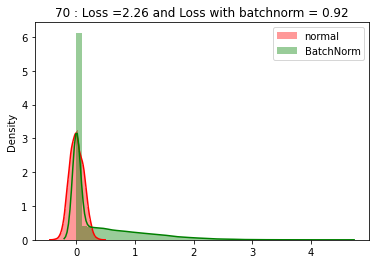

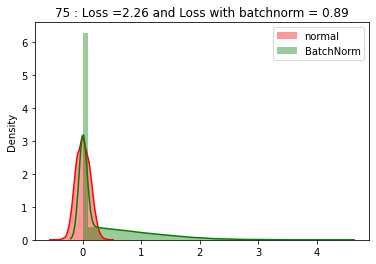

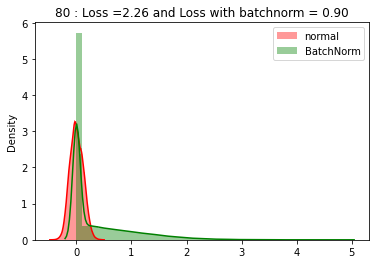

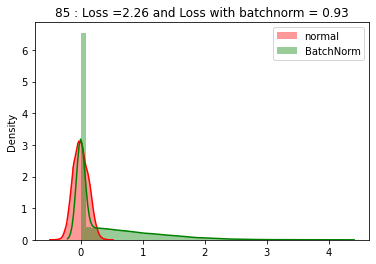

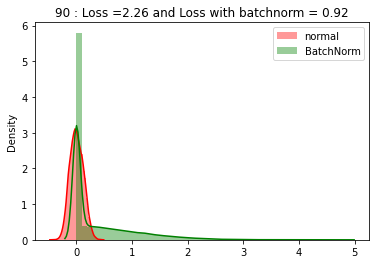

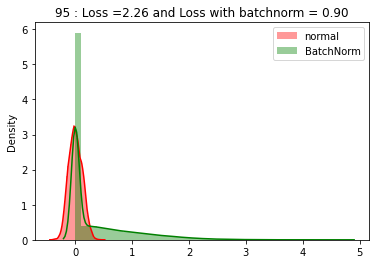

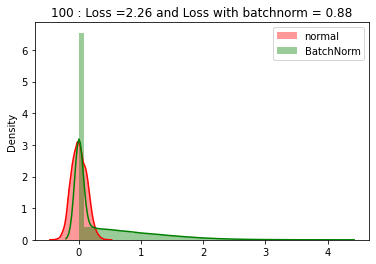

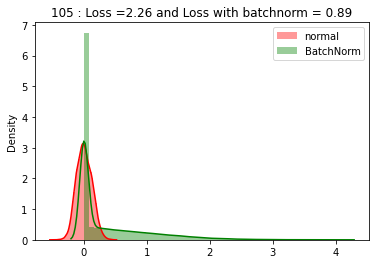

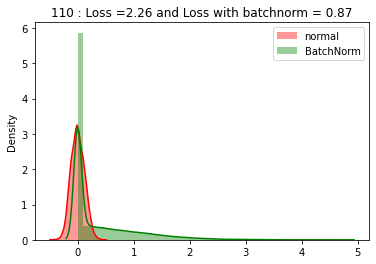

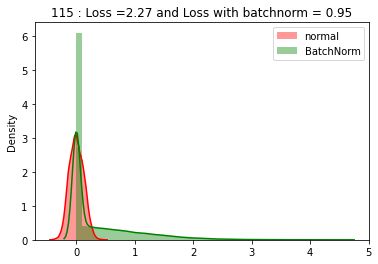

------------------------------------


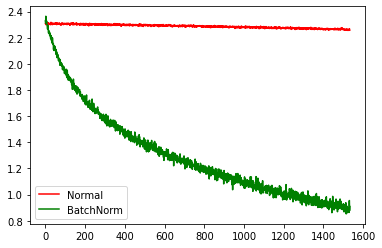

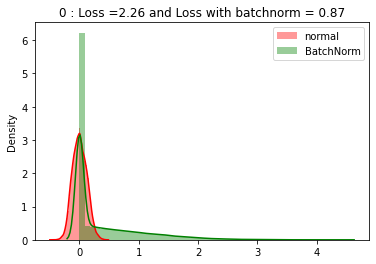

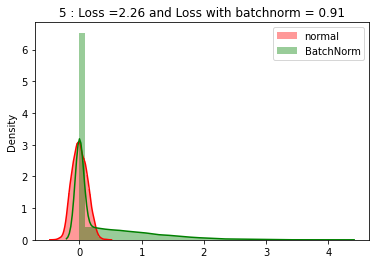

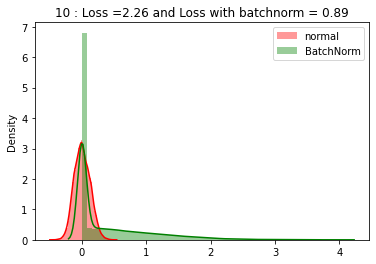

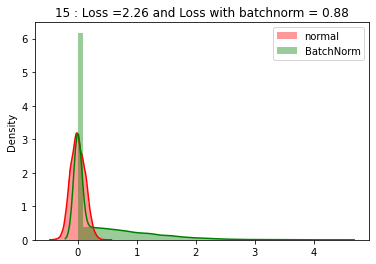

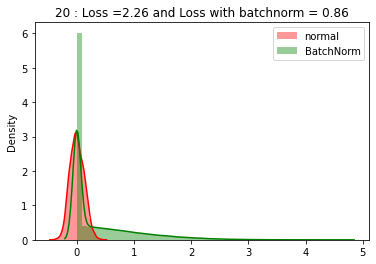

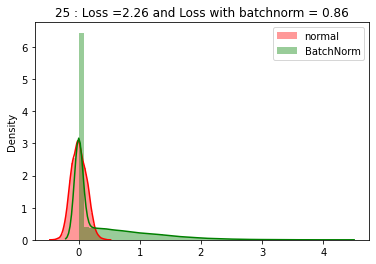

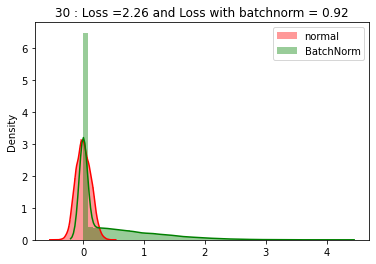

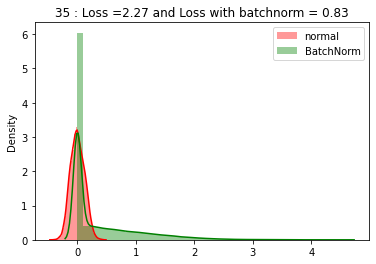

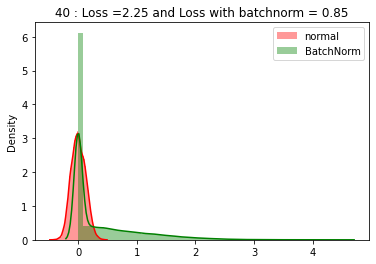

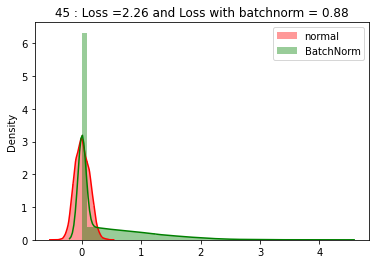

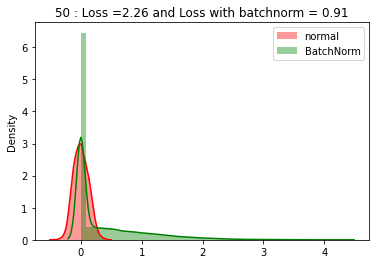

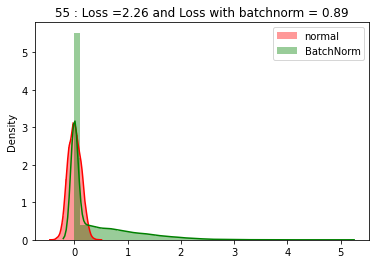

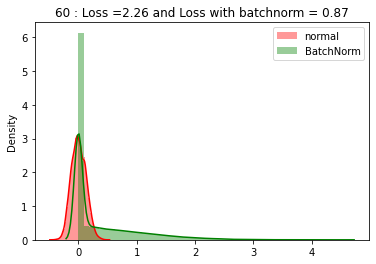

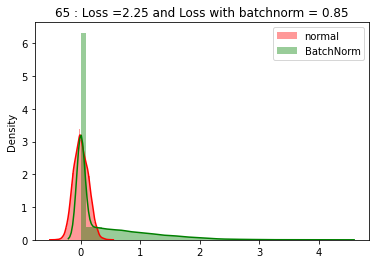

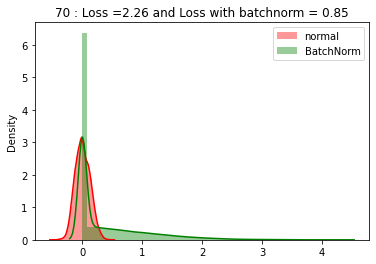

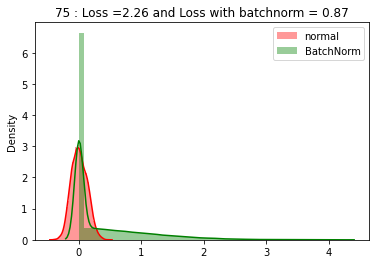

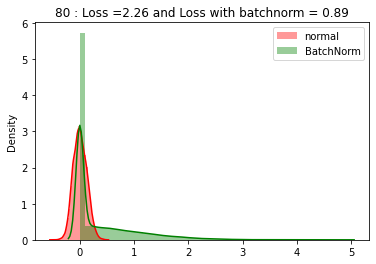

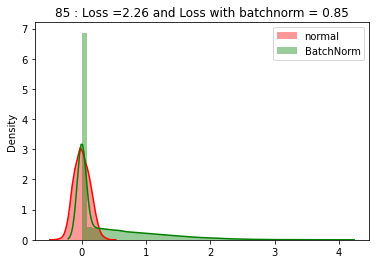

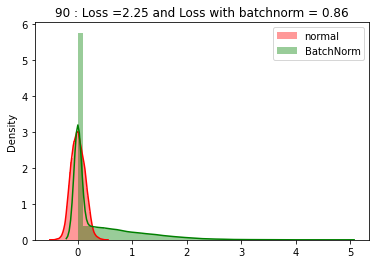

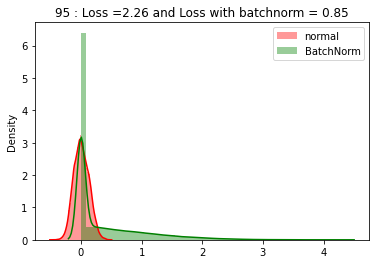

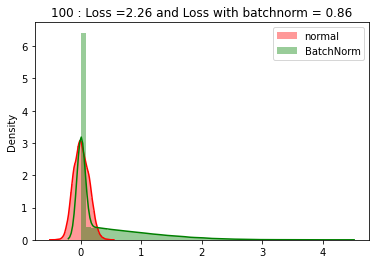

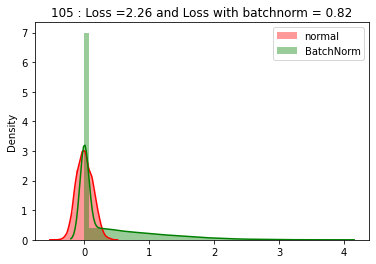

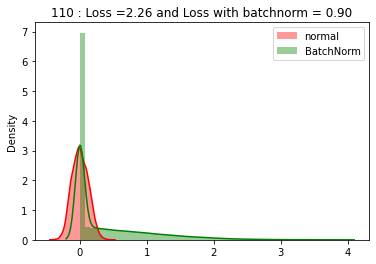

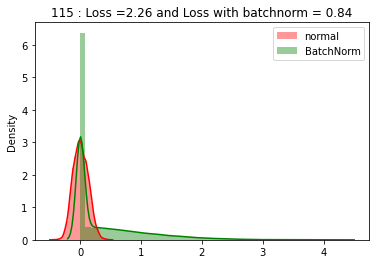

------------------------------------


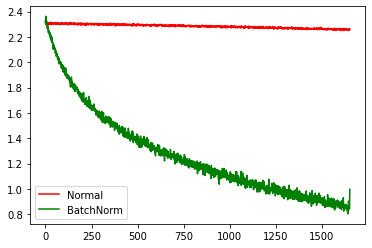

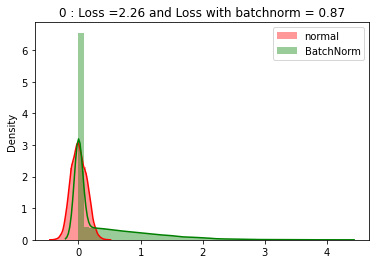

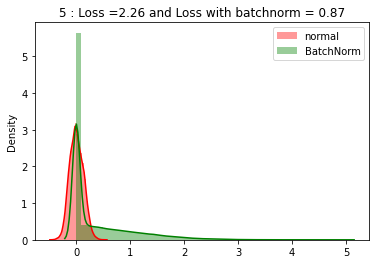

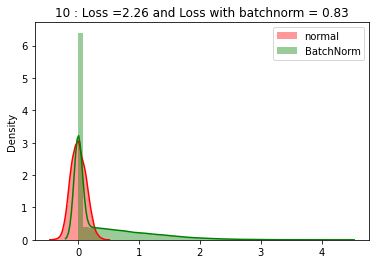

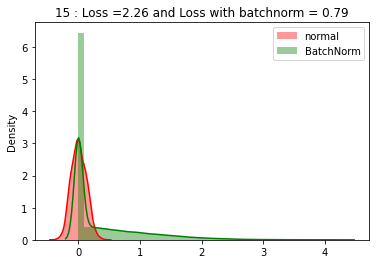

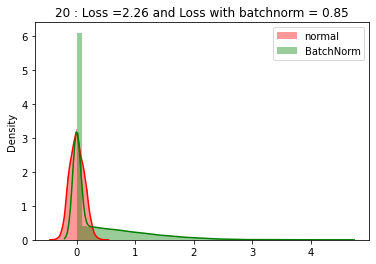

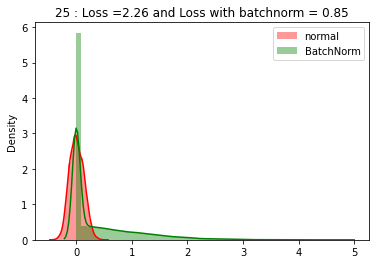

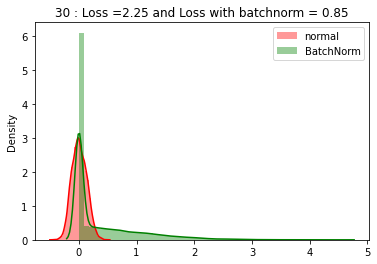

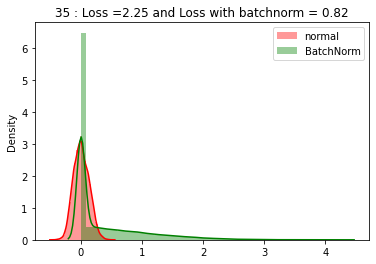

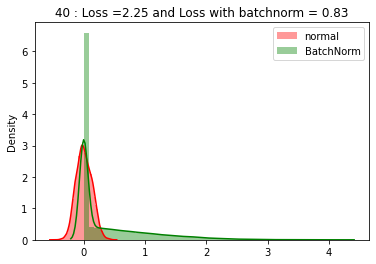

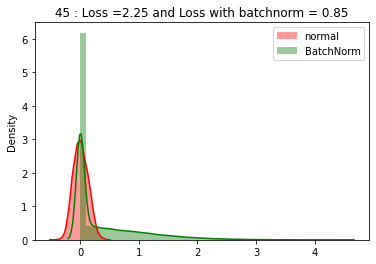

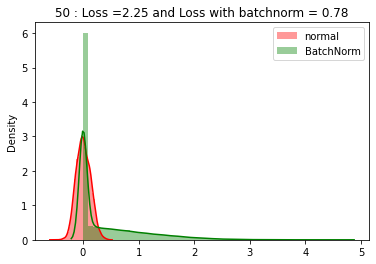

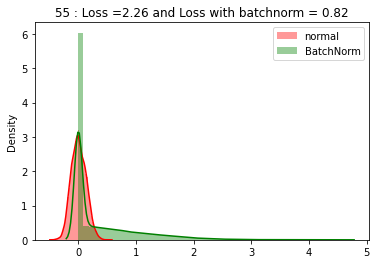

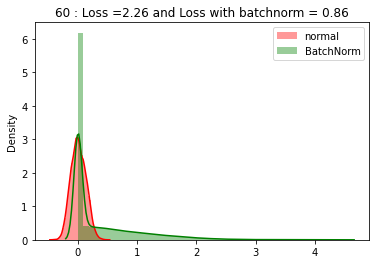

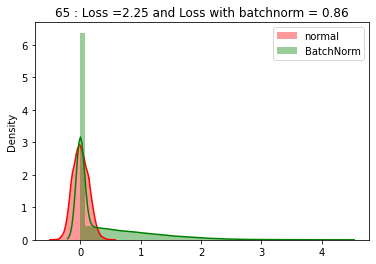

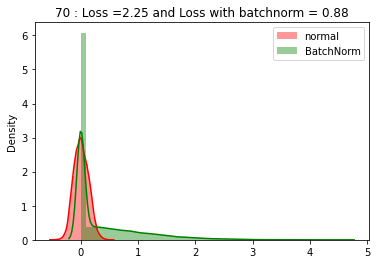

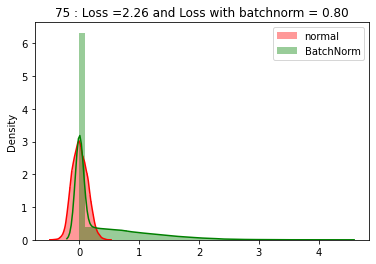

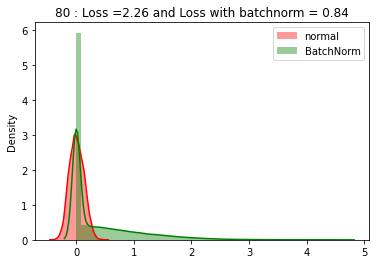

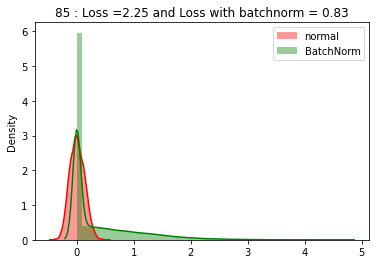

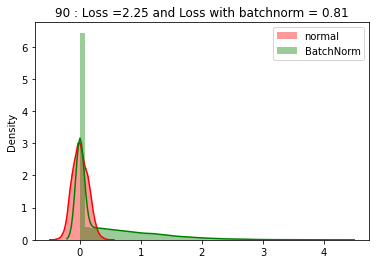

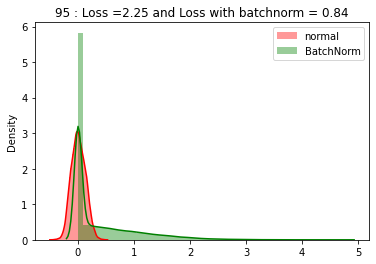

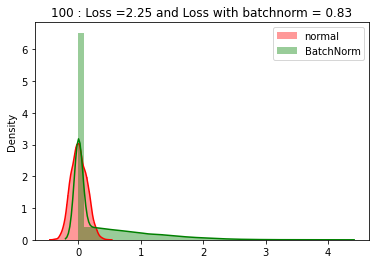

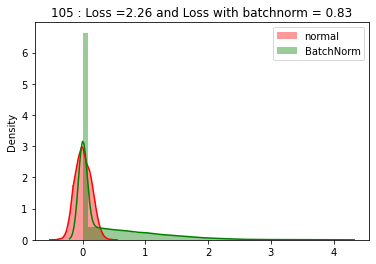

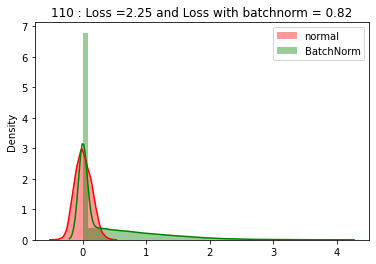

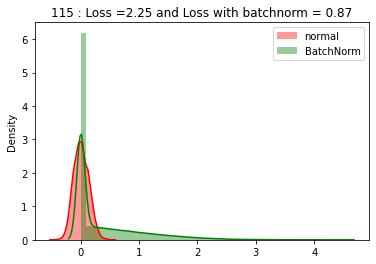

------------------------------------


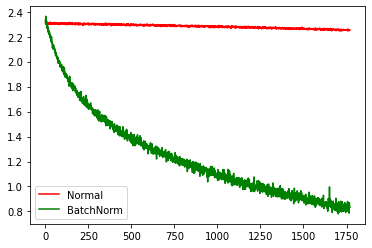

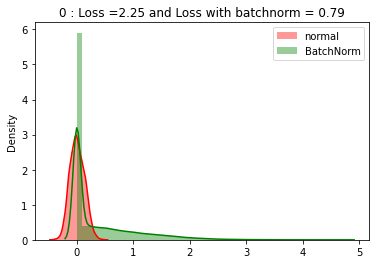

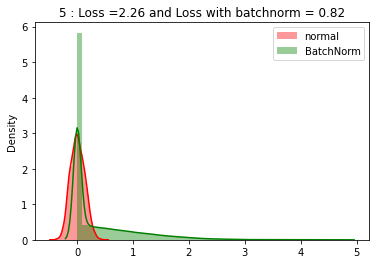

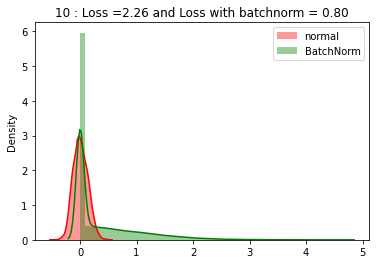

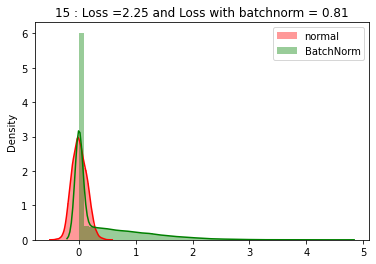

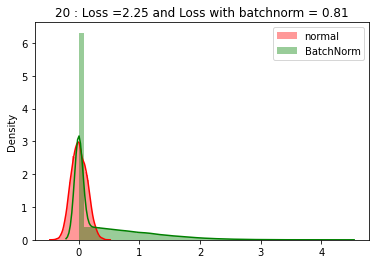

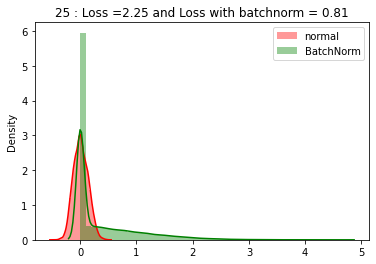

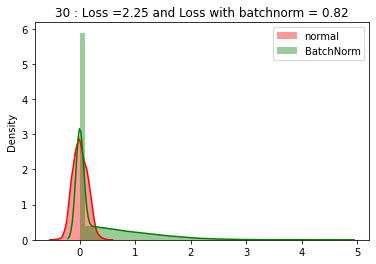

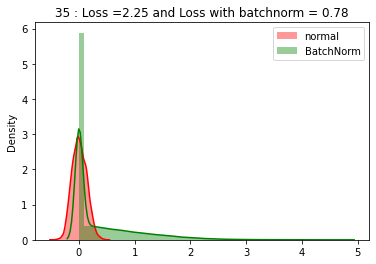

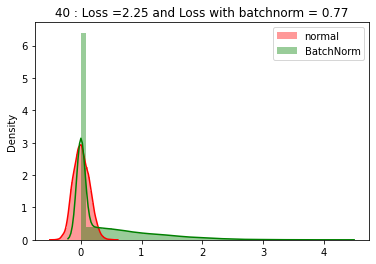

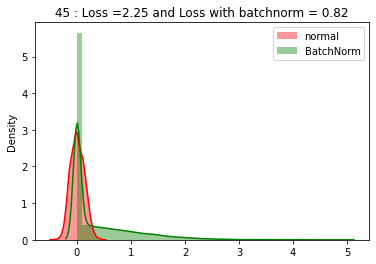

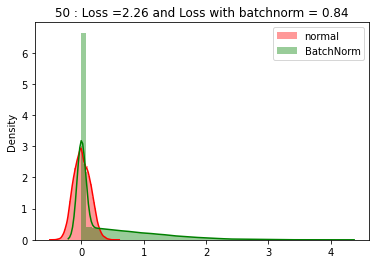

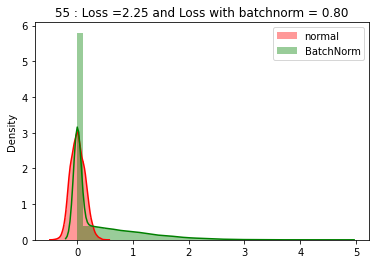

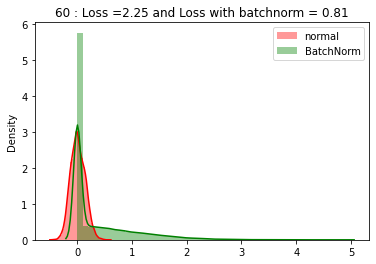

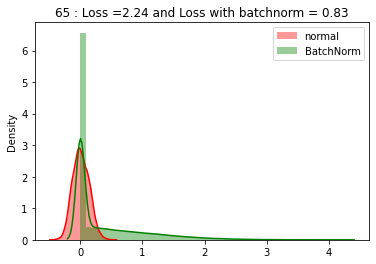

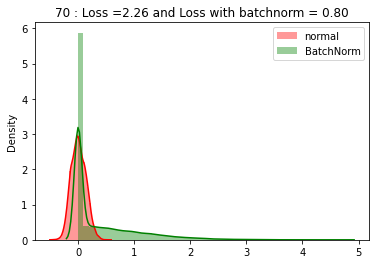

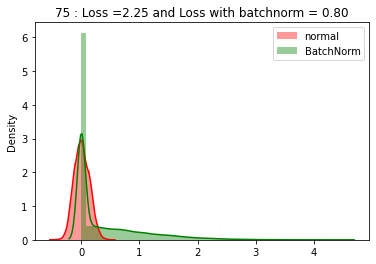

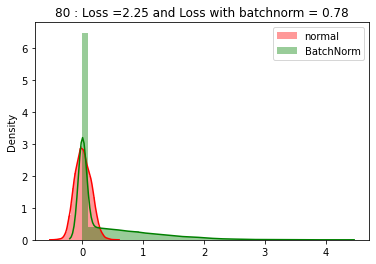

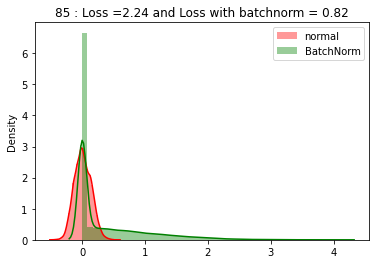

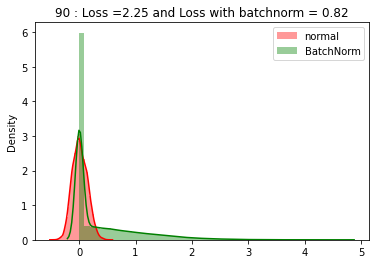

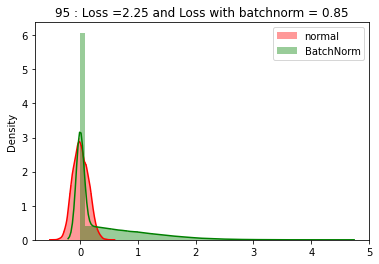

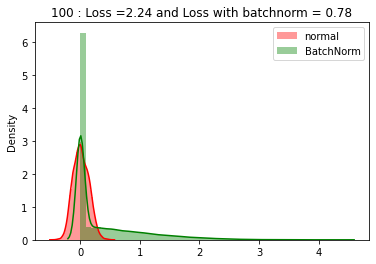

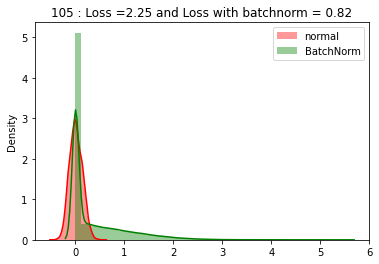

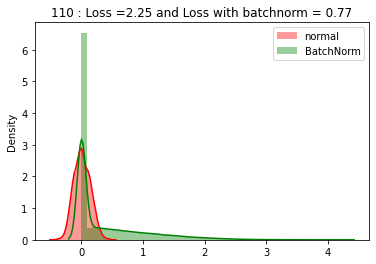

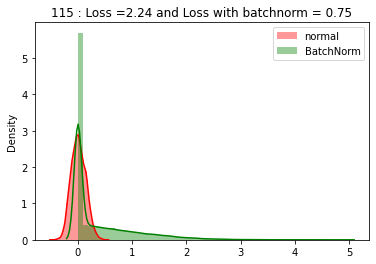

------------------------------------


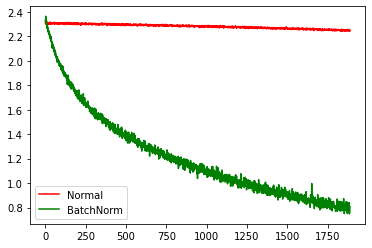

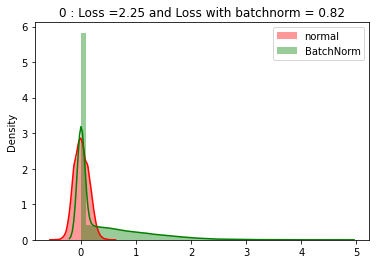

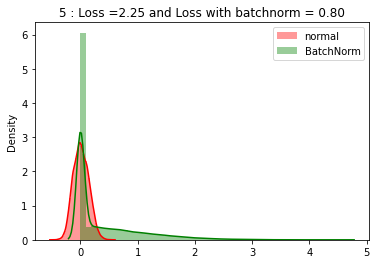

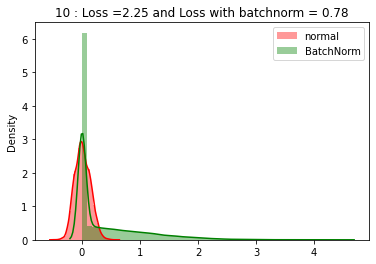

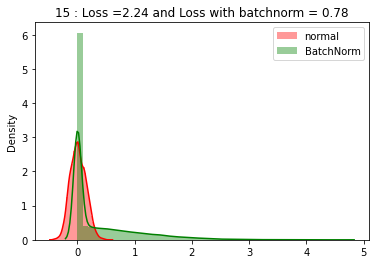

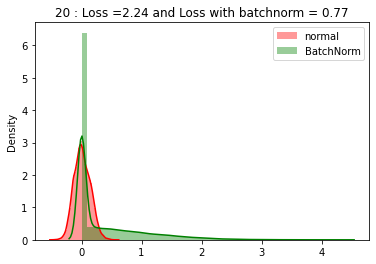

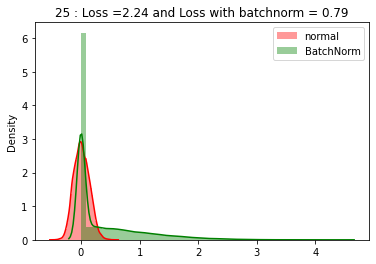

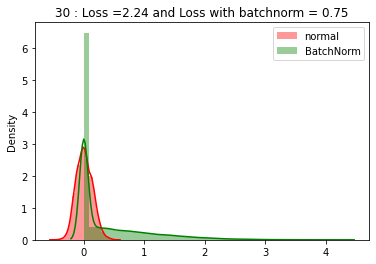

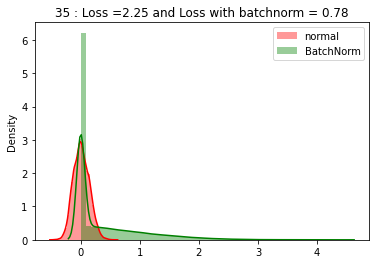

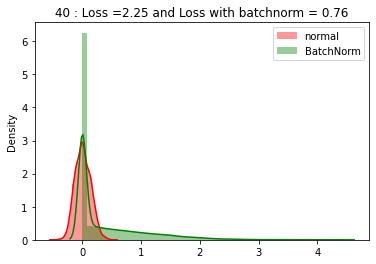

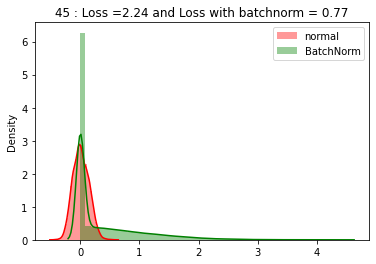

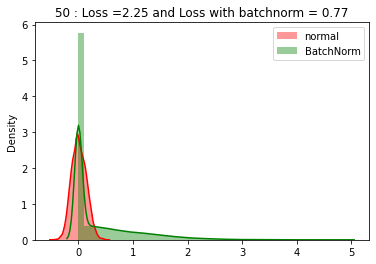

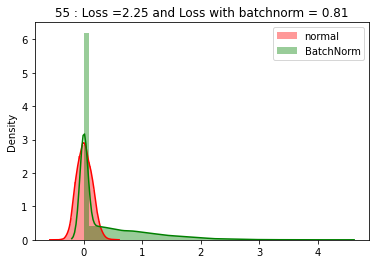

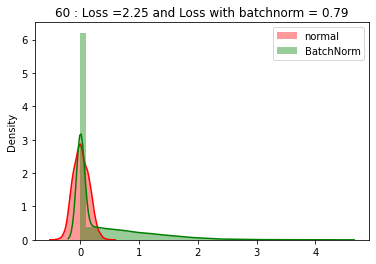

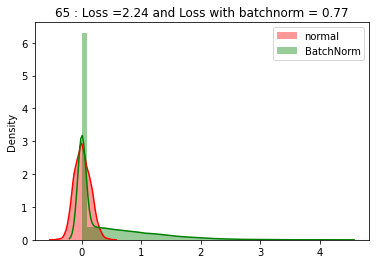

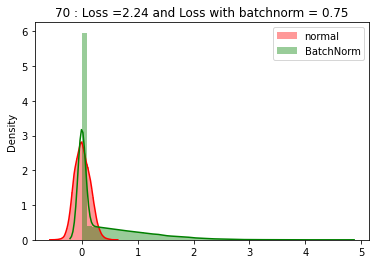

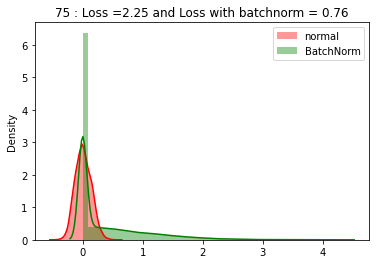

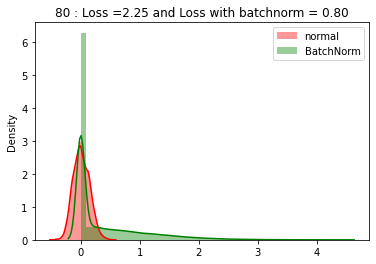

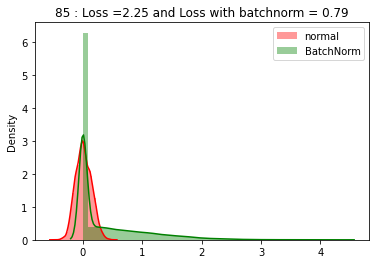

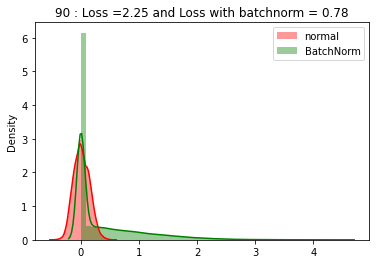

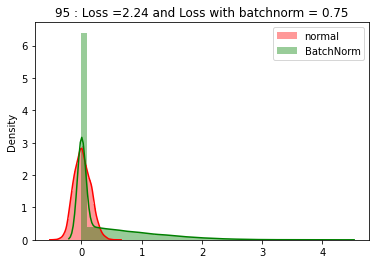

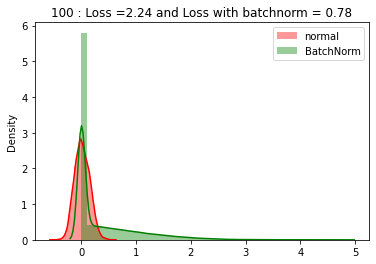

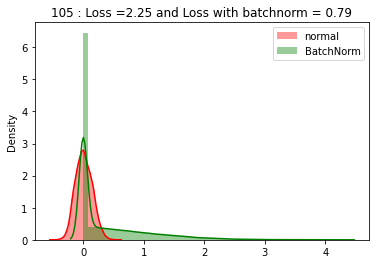

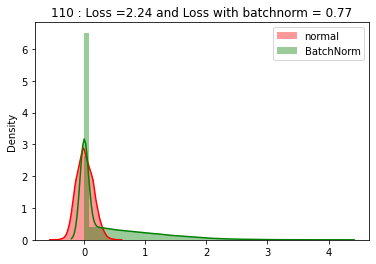

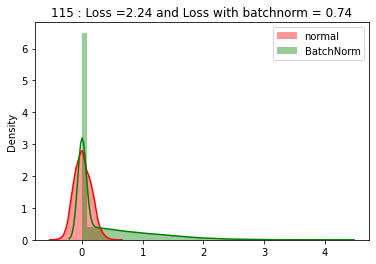

------------------------------------


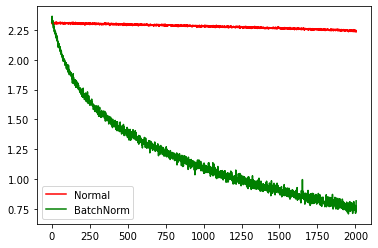

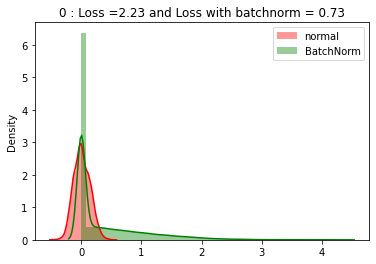

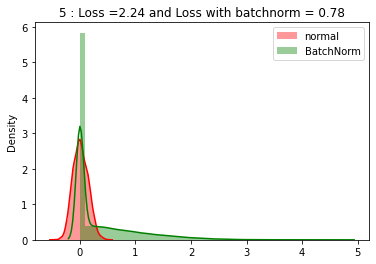

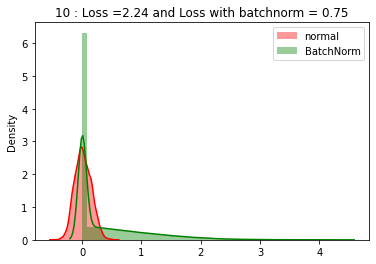

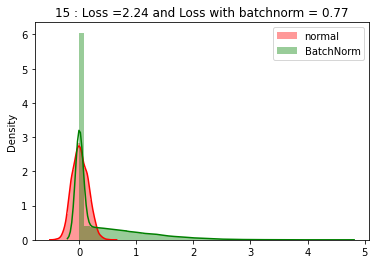

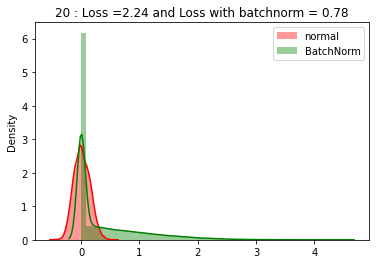

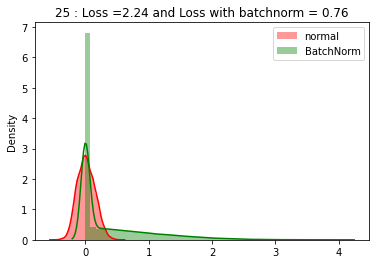

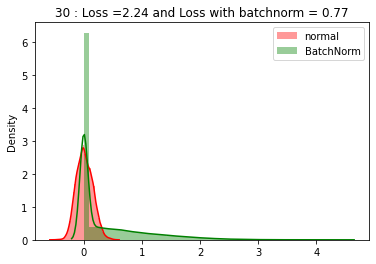

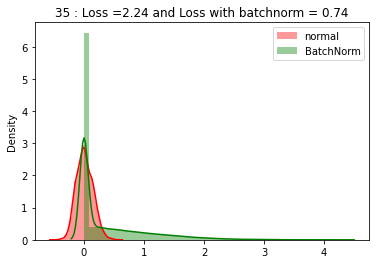

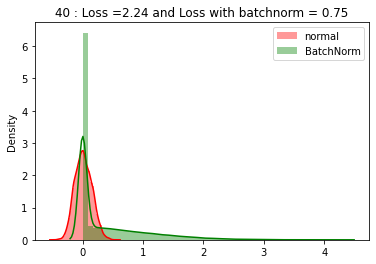

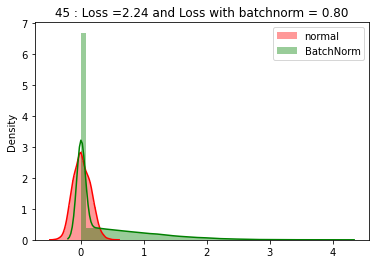

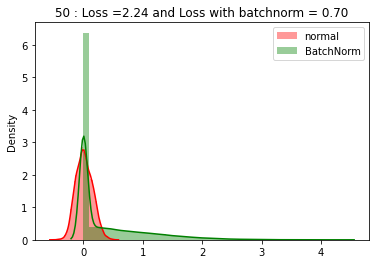

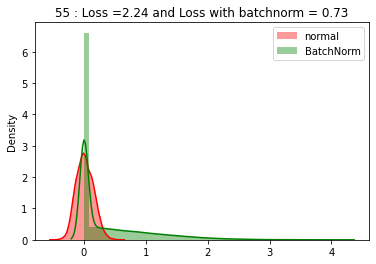

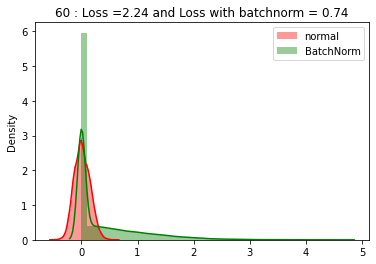

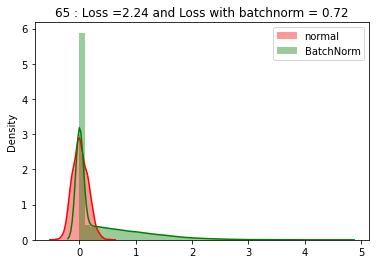

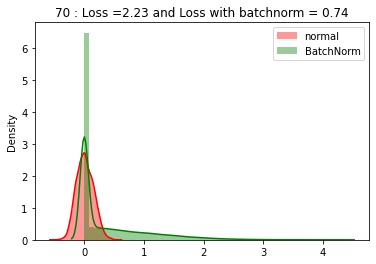

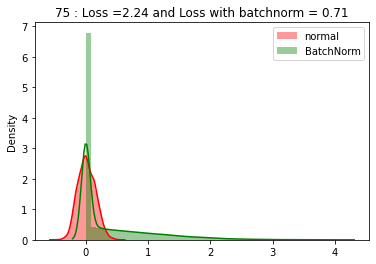

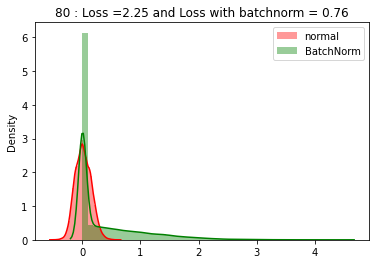

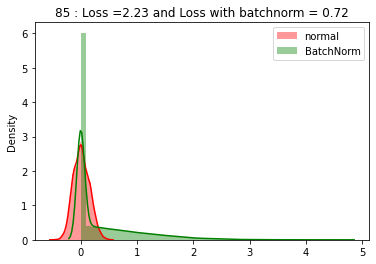

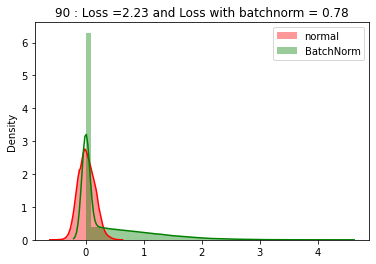

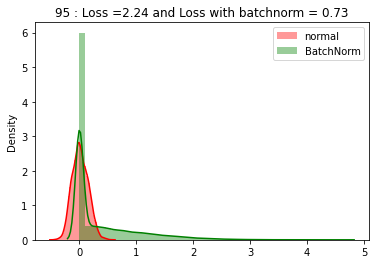

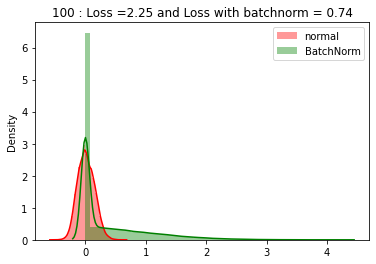

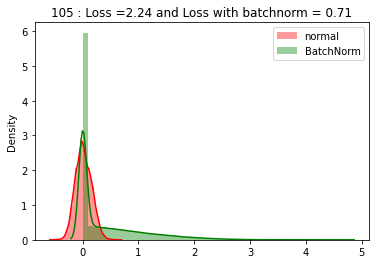

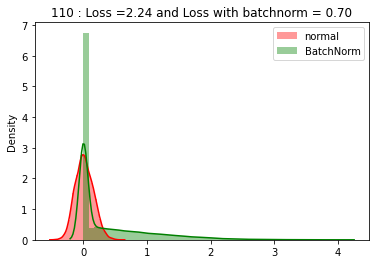

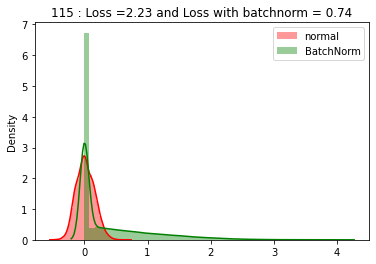

------------------------------------


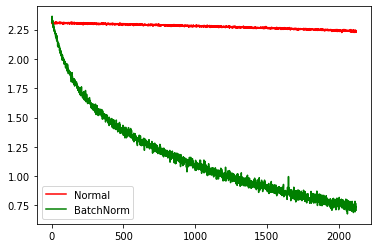

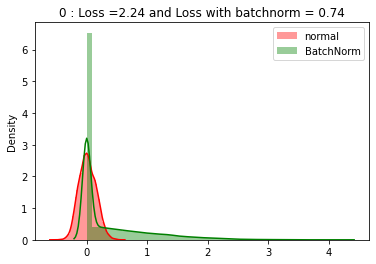

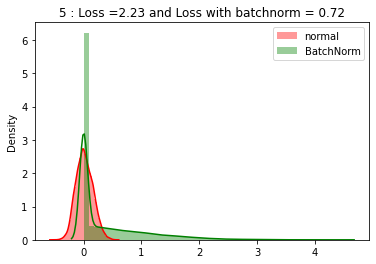

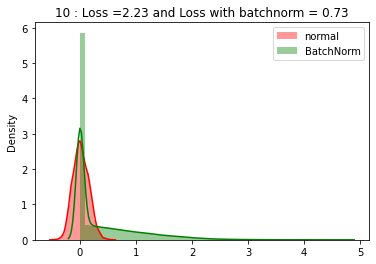

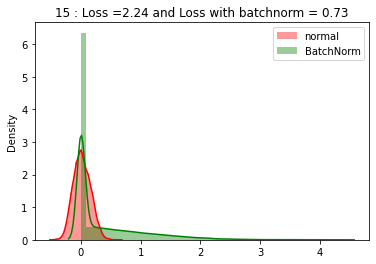

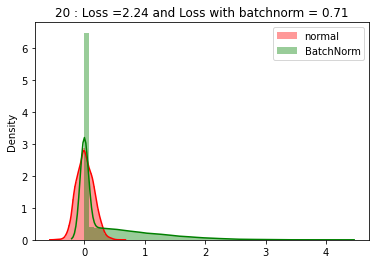

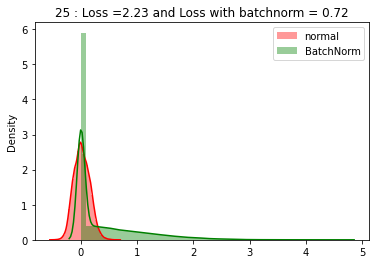

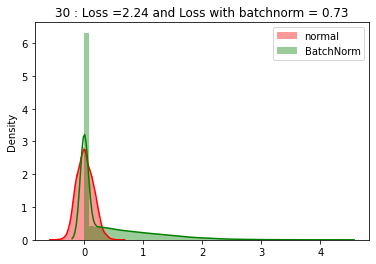

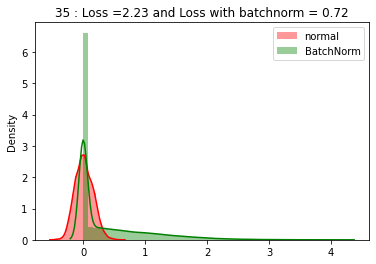

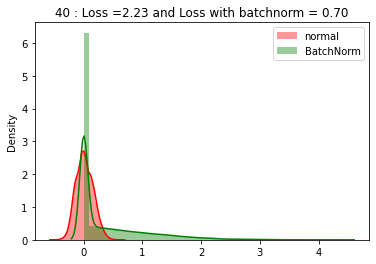

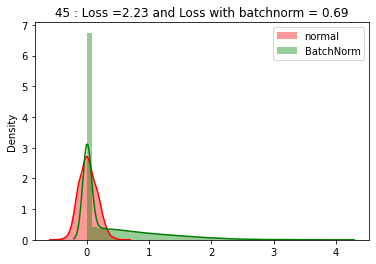

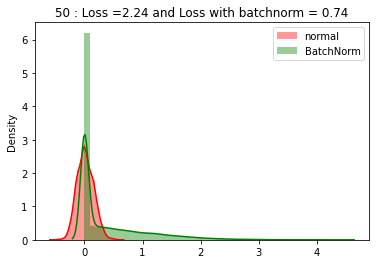

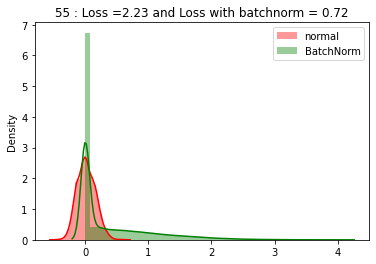

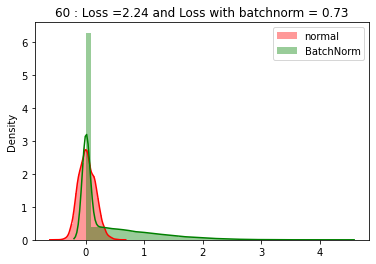

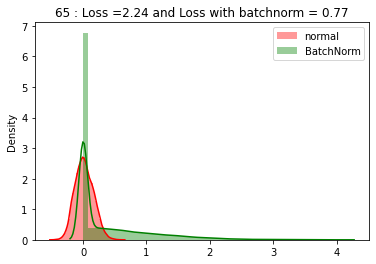

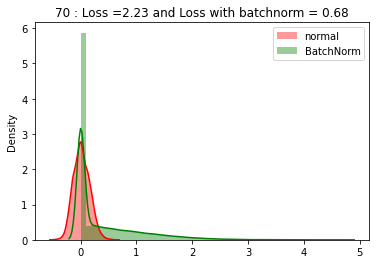

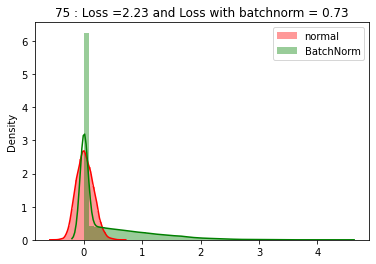

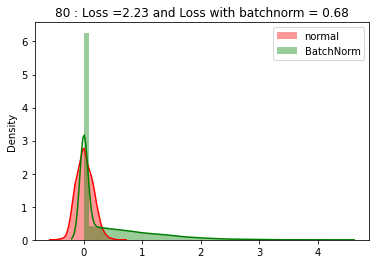

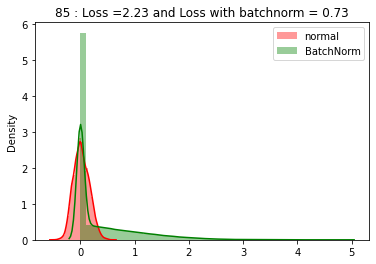

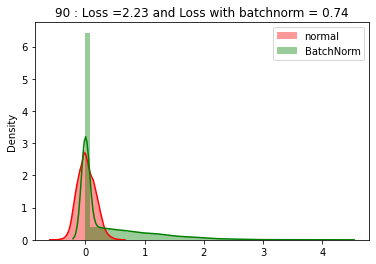

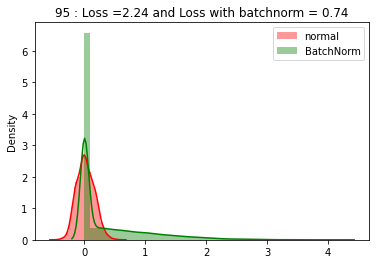

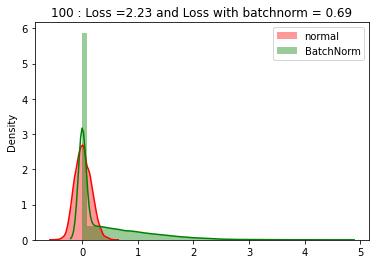

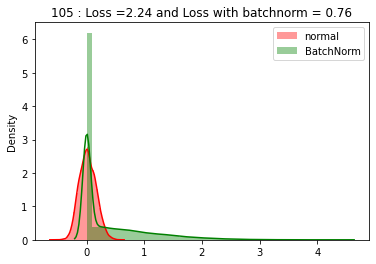

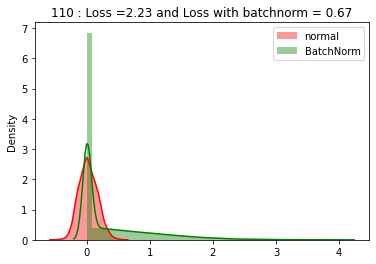

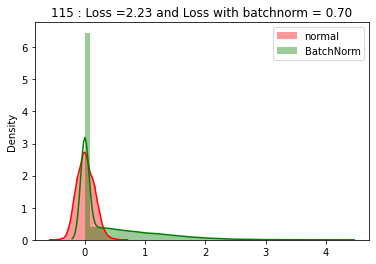

------------------------------------


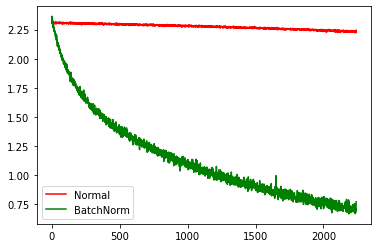

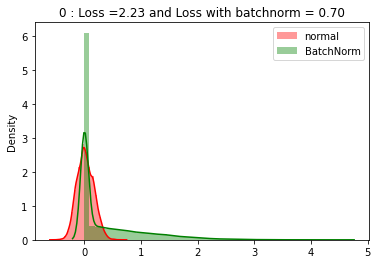

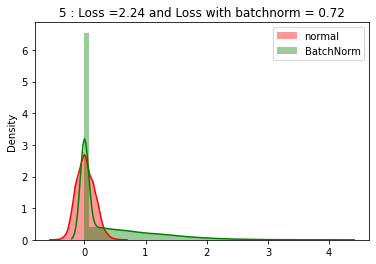

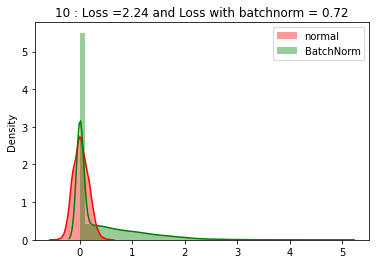

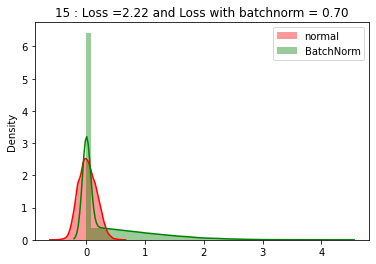

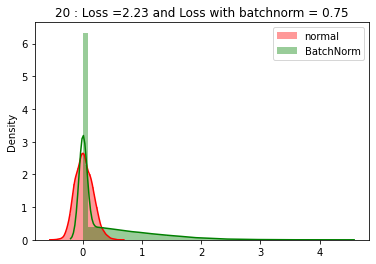

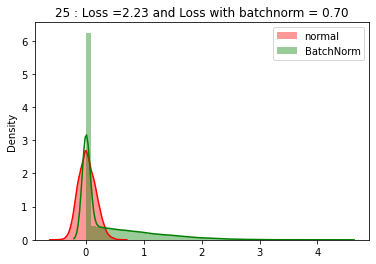

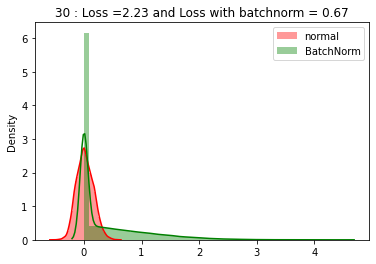

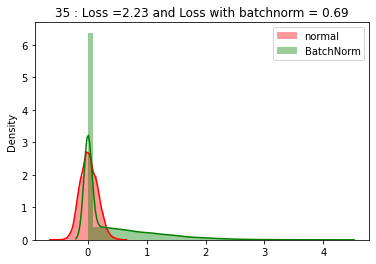

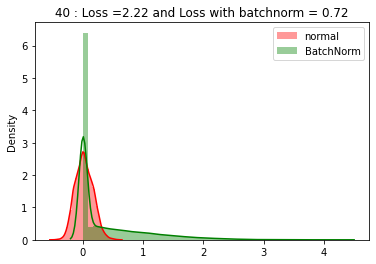

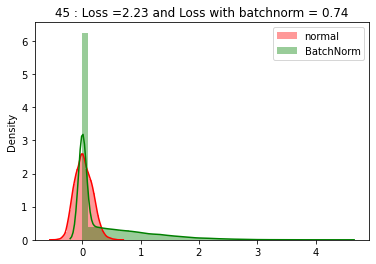

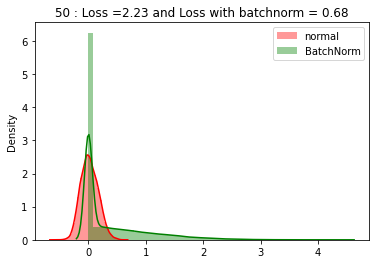

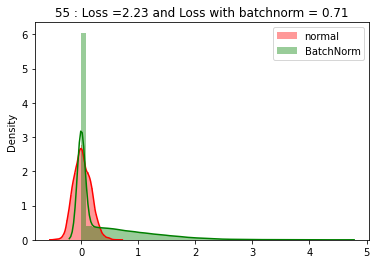

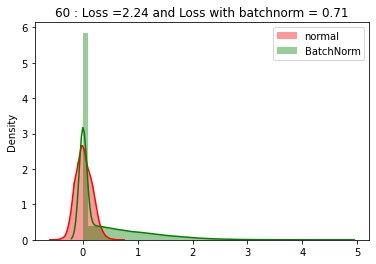

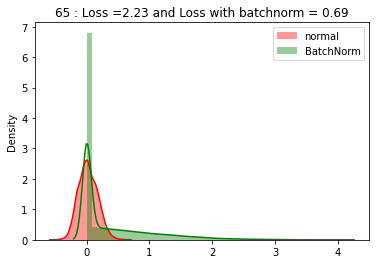

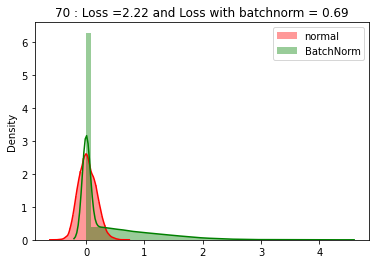

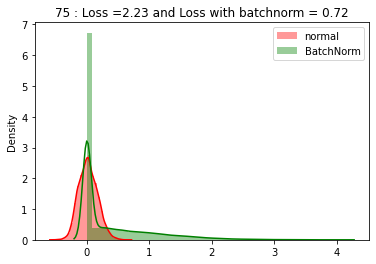

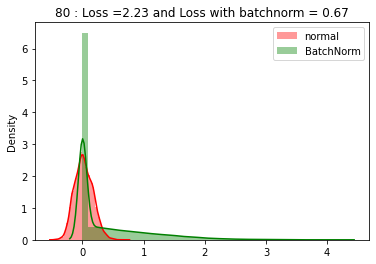

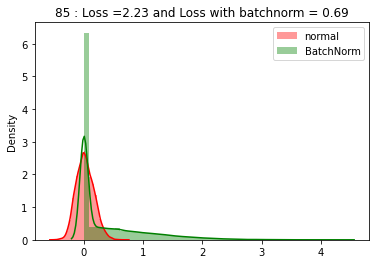

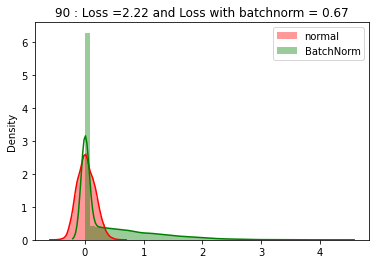

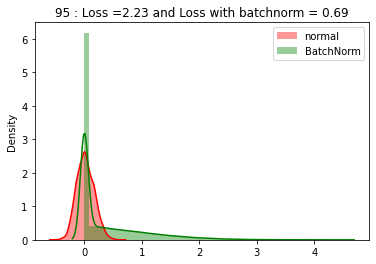

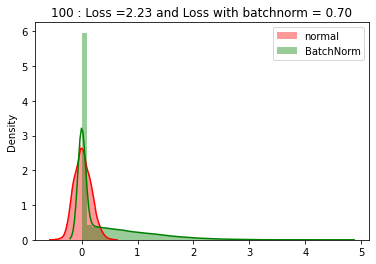

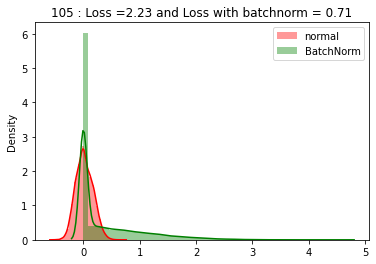

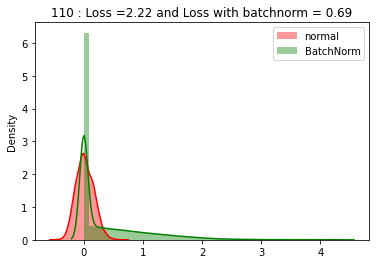

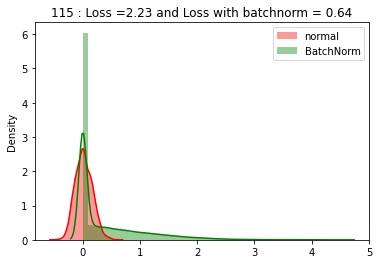

------------------------------------


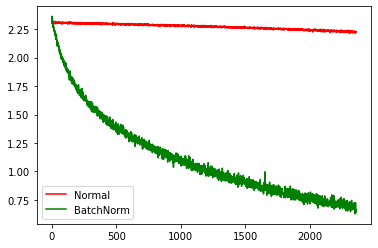

In [83]:
loss_arr=[]
loss_bn_arr=[]
max_epochs=20
for epochs in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    input,labels=data
    opt.zero_grad()
    output=Model(input)
    loss=loss_fn(output,labels)
    loss.backward()
    opt.step()

    opt_bn.zero_grad()
    output_bn=Model_bn(input)
    loss_bn=loss_fn(output_bn,labels)
    loss_bn.backward()
    opt_bn.step()
    loss_arr.append(loss)
    loss_bn_arr.append(loss_bn)
    if i%5==0:
      input = input.view(input.size(0), -1)

      Model.eval()
      Model_bn.eval()

      #Model
      x=Model.classifier[0](input)
      x=Model.classifier[1](x)
      x=Model.classifier[2](x)
      x=x.detach().numpy().ravel()
      sns.distplot(x,kde=True,color='r',label='normal')

      #Model_bn
      y=Model_bn.classifier[0](input)
      y=Model_bn.classifier[1](y)
      y=Model_bn.classifier[2](y)
      y=y.detach().numpy().ravel()
      sns.distplot(y,kde=True,color='g',label='BatchNorm')

      plt.title('%d : Loss =%.2f and Loss with batchnorm = %.2f'% (i, loss.item(), loss_bn.item()))
      plt.legend()
      plt.show()
      plt.pause(.5)

      Model.train()
      Model_bn.train()


  print('------------------------------------')
  plt.plot(loss_arr,'r',label='Normal')
  plt.plot(loss_bn_arr,'g',label='BatchNorm')
  plt.legend()
  plt.show()
  


      

       
